# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

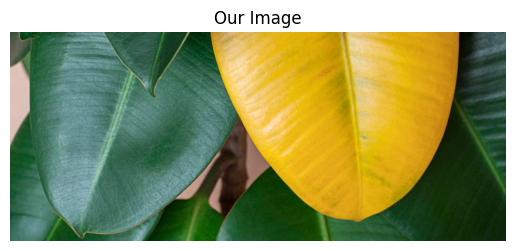

In [349]:
#@title I
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



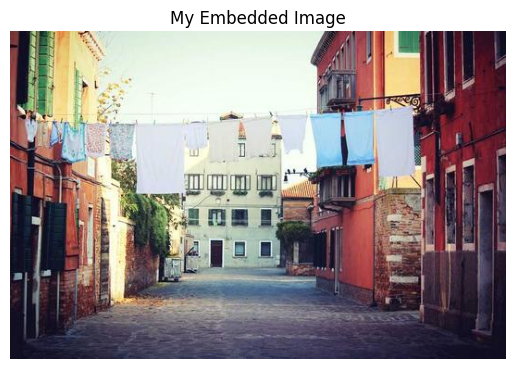

In [350]:
#@title My Hidden Code Block
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
base64_image="""/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFgAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAABgCAAADoAQAAQAAAGIBAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDMwOP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAWICGAMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAEAAECAwUGB//EABkBAAMBAQEAAAAAAAAAAAAAAAABAgMEBf/aAAwDAQACEAMQAAABxMjUyluX1XL9bnz8n1PO9RORT2z4PVKy9eGvPm64091dN1vzJ3dpk7oZ042TpiToGTpDKSBk6Bk6Bk6Bk6Bk6BmkgipZjOX5kpq2sLrlPVGy2Kdepn6WbH6rl+p51m890fP9fjQB0M6tq88kXTo0MzUyhkV30qop2aa6koAU6rLXyt7n8t9fosDoc+bH3cToIy00pcXpEO89cBXJFurb67ejFJ1cJO6GTuEXdAydDSdMZOgZSQRd0DJ0JmkgipIIp0DcJ1vndUMVEldkblaZxd3nohohn5A/S8x0/OCYPZv0edxWX6Rxtac0MUN0VpY+1jKiqr6ioxmwomCkDBRqrDS57oeez33+hwNvLlyel57qYyKaxuP0ZEB2b4Exk9DSrlvnN0qlOnGydMSdAzugZOgSSBJ0DJ0DJ0DJ0DJ0DJ2AHgvS+cenJXSqNzoUReZDQIz6Ufn6OGw/T8x1GWLJ1nlDlOs5TW+cEME9Dn08jZxVZtJFZVbNMKjRUnprIVRt870XOydQULpZcgHUcztxO1GTcnfGq/O6ObbhlFPXRkw22RNcb0QsUrlnSYknBnSBJIEnQMnQJJAkkCZ0DJ0DJ0Dc50fOlctGGno8m2JTVZWfoY90tADR59xOp5bqcsEyWeTcr1XMaXzAZwfo4amLu46s9x+hm8rPJHKhCyARVavHd53oMOV02wAZhyZ/Scz1UoxTbm7oU3w2wsKqsWg9gpmsKYplzNJ9JaM2B06BnSBJIEkgSSBJIEkgSSBJIEkgXO9Fht8fpx5+0Ysu00J08m/Lp1T8PRx2p3OdPWJtQFqhs63O0cATM7oy1N7jypqY8lPXVJpNVwmiYJ1We30GIPktIgLVjDN6XL1Ig2UHw6YwmHtz6jxjOtVgmhvmPoUW6TJRdp0yCSZA6ZA6ZMdRcHjnYs11q5XeaMemoCo0UiOQyoJQzATinB1PN4Hey0jzld2QtOPN6lyck+y/LfPOkhIe9rnI43rOIjXpubriyMTBxmThPPsqmyCDOzmKknnvXUk467cnfo8+swKWGliUenlLEm+UX21xXXXbKhll1DXleSKSO2DILFBBKKcK42syEozhweSRCi8CdNBJ9M1VZbDredekuyVK0LRzHnJktM8kqic7nJKsY2Vyz1m0olNGTByfI9jzS2CsLqmr67JZ9iVtCqqVdrit2g4dQV575nOHZV1gnM6NY9IKgUHGcj1++BaaRnGVM8emykhkqnaWuRFjOh0k26ZAkpDZmiJSsqhukydeTsZwtJ4u2sfYFRnbk67l513NEZOvmEVqL75Y49+StOuTO82TLHe+Mots0ohzvOdZyq1YM8HLsKeUJ2OyZV6csHiSqGstrVJWpwaqSMtcbSAM25Oir5+/LZu54Anfm7a3NJfNfO18ehqNrLQBdkXXO9ZmaLUklQ6ZArqb5YtxVeNMLZS1NVyofM0piqruQDVloJkjHsau1MWbpZN51OM3VyCc50eCtevnnqsy551nP1aqZK1F4hmct1gUVzoG1iZ997WWNDzjuq+fj03NuJzrvGcueV8e3JNzelma+JubcRAB1UXhmQJ0z6LRwCOfTpnzyax2Mk8EzwrAK4ZXScT2XRJSS0lOyB7qIIKrwiMa05gUBqwySWHLGpFvQoGT0G5oxratFzqN2Ec+ls4OHzgagudC3oj1VjP3eX6rDrA6TN0Mr1XhPr89ovOarlWLhrzfP9Zzeuy6fnc4nXuERVD1WtwvotVDp1rx60Wv5u3D28Lo6zaF8ctsomqO2G5pZ1uTdGXZWaeKbpyYvKd7yQs7seO7PeCmi+qkosE4QokHL54qHpzbARszw9wGzRhHPSjEgyxScI+10lwT5662eFTjqLznWA6HIGWWdOIdRtDKem5rpOfvtMA08L0Z4FN+f0hXEFZ6dLkhXWcuBtY/ZmaNMZaGvE9VnPIwKVKsVCdXkOKQIQXZTQHQWAZuW27ZjlFb5mefhuTKmWaN2+P67XkjxvYcrmseGlh6Zbg1cG9TP13ms8+eloStesVgRcQBKlBldZcRXA2xHlklVUs/J0LlrkvqQjTNMphYPWHdrjdEGpPR2MHoseu2iVMjSvZZwJYVzfK0XSAsLosfR1jk1Mv0wZzdU6r6zxdIO8RCZVIQpYgr6iPRFPEZmjnKrSwzQ2ngXy9thUqkge3867+sLeH73PmeBB0srbIxx9AWs0S+d9MEsG9ANXL19sTuP67FGD02JtM4au99V2yZYVwXW8z1GiySXzI10xw1Ogm0AXaFqIi7ySmIVrTGLw6pxlEycmjTfMOJo0szTIswPNNF0oQc8CouIDLCsgUioAIGKBKKchj2Vk3EiHolnaOaKw/POnTYTR5u7pB76DDK7HhewrLYoJzIXF4mtlbq0kG95bvQcpq4GwF1GGtaLqTdc0GVMWPozqozqtuIqqiGawTTqWcZMSCslhEw7U52b12oZVis+VJE7XkUWY9VrNSZE02HVziS0M0m2i6psYA3N0qyu+DQJwOg8giByms+6FjKVahZ0ZRcPr5WwmGGQMS5wRy11bhSubu6AW4U5cfrOP628+hydbE564rJ1s/qarKz7y1dPnt/Oe5wNbMy1Ihka+2R/F9n5rS6Tb5PsUZsLKbz1a50Q+f2uO6nUxcPoMJVcLvYhVVdlbV5A9s6aVtNufTfZVPHrspsGeRpmdY8DY51dZkn8/qDWXu5Duu2vfHyOnn6WmIsSxHIVlVjD0ymsCKV4y3+f6WTAqeNEihNGdLdKi/Dq3wyhpyE6nge0vLew9vI564/OPC6bhC46pyOhxOjeFkNbJkjoxIan596Dw7ZfYct0RIlOhFK2iVYsjQnXZn4Z8XZXP8AR5M2BTqAXMpslepOL59N1tFuPXMIoOsi+g5Q459bnSM6otvAKboZlc3PGKoaMqKzt1cnVazqyxGqElLnfK2swegydWXRAIUaORE629Bk62dGY+hlZsHruL6zXPqcDe53A5kWdHSOWIc1mdPyxby6UDM6ZPF0jkil7HFVQSzQsTHazo6UGZzHxayAOnYrnn3aZ0wFt5LEg5GhbVvG19o9uXVMA7PeaNz+irnwKeuprHlyNoNvLTNRfF4y6KbK6ierk6zBwiwmqkyksacRkHAbpGMIWDO2naK4atQsZrSQBsaB9dze/WHWcj0/F4mILbLpIG1ScGMPNwRKD1Nqqk1ZZQzV0YwaselNWvTEL1RFhKFYZaBiBIE6lVSeM2QPbVNWWjzz6CKWU3XK8EmKjbWdOoDIKpQeoua6ibprlCono5hbVNNkGVpILWqmi7cwTSQ6J1zoYyiBDwSu68WqbM1sU4y6izJXPZwTvThXOdJrpO5aFicxaxNM02ahUZTSHgSmholJgTGRaCgfAYLGVsCp0WDJbTpYCiYjHVsVVYhUEFUj1y3Ur2hr4aqeRF5UFhliw6IyhUOUIUyqEoNQSQNOEwsNBJSEiolEKohO5TICu6MhFSEtQYhpIKhS7L5iuBzgyAuQbgY4cAOYZgMcccR0Q0wthIsPiGgNYNgMgI4FMJEZcBogWwlQGIRBchoMJahgtjGoCYiVopaysJRUU2lWmrNDN0wDrlWFaSaU4OEyakKqFzjqIebV8YuJSiyd0qZDtlS4yZQqEVYFai16JMm6qAqNaCbwkFrQYHeuYShOtjxignBpAzJBGFlYKudY08IBdW0gjFMDQkwRTIEzMKTMyFF0FTXVBaSDNMgR4iZJMdJBOypCuVSZe9Lhc9SAmQ0guVch3TokKydEglbUguepBa0YBcqnC1DoCZi2BOD1sdkgaY7ha0EE1WwTaKG7RYJtCISepguhBglF4IkzME60wMzxBKKCTRSHeCCTMgSSBJILEkCZJisSCNiQmsSHF0gchJy8Eh2pILK0gtGSBEJCrgkORSQJ0hCTSGoJMatITWJJxSTGSSGgkNopCaaQ65JCg6QNBJDJIbMkhnSBkkCSQJJB/8QALhAAAQMDAgUEAgIDAQEAAAAAAQACAwQREhMhBRAxMjMUICI0I0EkQjBAQxVF/9oACAEBAAEFAgpfJSbzzl12NKhdaJyb2/1mZKJdBsDWnNg/3uIT603c6NtkGkrE6yd0qFw77Le7iPXlIfzVcz5KuTaaLxN7z3TeZvbyb4z1D2KTyUX2KvuaW4s+s4Xch0c3JsebXj8UlrIf7ldNo08xTGpouX5BWQCd0qFw77De7iPVDpMPzVW1Y/zQ9g7j3zeZnbyYPwnroMT+/h32KlrWuaCmsGke88v3JHkmOErIzk3/AHOIVOpNa6svyRtAuw9E7pP04f8AZBGpXsL1pOQY5VAs+r+1L54e3+zu+fzR9nKPwnuKPXhgJmqSSmsYVG06R8nsd8ELO/3KyTSp5Rd7QgzJfIzDt/SMGTJu2hH8gMAdqLUWouLG9VWfZl88G6/u/wAlR54+zlHuxsN3HtXCtpqvuYHXB/ER80/nb/dqqf1EU1LJTvsnMGJH5f6/pzbq5Mc/Th/2vZxUflrvszeenR75PJUj88XaiqdmSfUNYHdi4Y0udMS5M6tFoT1VRtDE4liKNw1vT/b4qNr4DLcy4HVFsxZfqftoPtezivkr/sz/AGKdHvePyVfmj6L9XI5SeJcL6DMgNamgWX7qPCCyOFZDW255tCZkf9nirNRjoQBAy7GkvmicHG9wOn6mHxoPt+zinkr/ADz+alF3O75d5Zadz3vpNKDkeUvhXC2hzXswiZllK92X6HWo8VTGX0HD45YY5BIKxZ/lAIPX/a4r2mZz3MFoYjaopXNDW9R0U3ZQfc9nFB8q/wA1R56Tvc0mRwvIJ4ooaiZ0ruRV1N4Fwwhscnazytb+VDrP43NDoYhunPflmwAkPY1thzF/9bijc2xw4sb4o7atP5G97TdBTEadHLFFVniNIEeKUwD+KMYpeLGNT1hqFXj8s9tajflI2laxr7Gb2kKbw4Ovw2Msim2EXmZfVQ6z9lhg1EXAfLm7tjc1oDQ0cx/rcQ6vs2I1D3ISPKzeo35Pjjc5enYn0cDWQxjKmo5DDpyQl1I5skchkU3xkrXakkt9SKXRlmrHypvT3SNvF6eOtggqImRSfIRs/LHu9DrP2NHwHV5swvxVxkMJpP8AMSAPbcW9tf3TSRgSJzJAPyB0VNJanp5wmwOToi+OCn0JcjqkkpkbIxUiQpzwtaN8Mz85v0mdF+/Z/wA/UVVOprsoeGy6rJIXsro4pmP/AE3dTj45Yvb1l2iY0Rtj7WWdzsrcrK3vnq2QPnqqiRlNVVWUcmSyag8W1FEyyD3AZlZlZuT3Oax/5VosWk0KqZeCPLCxVkWodPZxCsfTB8jpTm4grTbhih0A5Hn+h42DZzBJFJGwtw3mafTxXfBnJqyuyY9rgmSOAdJmHNbI58xjIqHuf6k2FSXFjsWZrL55lZlZlZORyIAcELgXcsd7KwUTshbm+MyNxxHOQfDnxEXo6b6/Mdvs4yN1Y3fsR2Y8wbjl+yh2M6QG8cp2DvzNeS/INk/6SNIRvhtyb1dk2YFWOMY+X+E7ex3bBt7A4AO3HL9u3bzrvr0hvT829vs4w24YbO03OdLYvZ2LE2/Q68ieTXNcyPpTSsAEhfUg/IOxlmf8ovnFs4O7ejtk21yQ4L+sN8/8LgT7JLljIZmv51NO6V9LTTRy8m9Udjy4m4to+FPyp+bOz2cV7WOa1Ou9Sj544K20t/Rs7f7ZXWJQCsvyRKKrAVV+V1B+NudzI5zXCRwdALQNX6PQqPvmDQmdoItCPfa4Q3QBHsIyUYcPY8bs68o+ql2k5cT3ouEO+XNnb7OIxl8ZZhym73G8pNhLK4sxcsfmObYpHq22m0xy5NNJOImMcHCo8Y6xgY9JBfAYvZgmDTEjjKmHe4Cpj72KQ2TCC93bzvZMkaW3snSNYNZpY99lGfyY/JBtnKo7weVb8qThX2wVdXQ7/ZW+Jwu5wLTP3B34w26IATO16aUVD5H1sTVjimEkVNtWBzxDlifUSWyZanrNN0VWahjdS0A2LQ2ZVm0N5cDkGNlOQN/czkTZHdbo5Yre5VuVgrBM8vsqj87q6laTFwvY6jifki56ZcTc/wB1gvDQdasfyqhMeQ2yO5hoM46mmijphsioPM9tj/Rinw1aQt0pGNc6eBscbBkylaCaYtaFAn/YVf8AWppC5k87GCGRr44uz2sRdyBvz/fO9+bPNJUsjmZO189VUemp45BLFxGobDIeJS3/APRqCnVcxDZZGGKeUyvedKn4f+P/AKeyzXOdHFGqnz1HWH5PZBDE2ctNRLWTxRxyyyuRUHnkX9W9anz0gHp3u03vdFJHTx5S08eJMd2epkgUNWxOkDpmOcTxDL0sc+Kc4PjBcHQ+H2uyvnUmFmv6oOdi51RmJai+b2qoqJoJRVzljXuze97D/wCjIop5Z4qfvpmxVzvSRZOoCVVYUznuyLn3QbdHY3JMG8w6fo7PbunfEN+YxTHfk4jtSU9NF6au09emtqSl7i7rKBpw7FFRC8xaurQqnz031z5qhmUVGP5NMGuUmoxG7ojTMTBPGYahPcQ2ojp5Y8XPV8oIBjB7XJn0P/pDrdHq9SgGtI/gM80nfj8oPjDD301IylTpWtUlSVVQCdSUcrGtbtE2wIvVwtvU0/mb0R7o+sxVP2qWPMVcmpRyMzjl6U/lc24yuTfCMbi7l6aVRMwq00wuc+DSVR5qb652mn7KVtqinZvFd0MOQhGyHkhF2BllM0ETQWkfDgWEBgcCrhXWTVqx3nkDYRVM04ZtarMRwFVYip+WBcyWtIqDVfhiBVT+Meq+VNlMwP0nvnc9D5cjcCrddrW/iA/GB/NpfuU/mb0XYwVLw6WokKbUvCbUvK9RJaO1Qn2bHNuIzZG4LtnEfj/tDPHDC/iIKZJlO4WLvOHOBPybHVyRJs2rJLfCl80CYcUG4J3XKxgqC2pa4OUnSVgbH0jhfdRO00yMOf6RzI2h7hG0iVjnSVppIbMiZEu5SU0ZENKxp1W6z6aJ69HCCp4hMwcOjAgpxAauVzIvVVAXrKheunRr5VMUbCJjhj8RJG1scrGNY9oe5CEXyLzuTssWNcxrSnLV0I5GXE/WMZFwT+riC3+z23piFF1d2ny/vfAd09mIEhrJXMVNI4zdCT8nSRNabagktxJvWfxSuZE3TjTwYan+9NUGJ4mDGugAiFM4NhJydJZfJyu5EuWT0C693ol6ycs3IuenSuap5LrNZXRdZTlj21BfII7SLQToXBWVOz5h22QVP1LVurB7NXB+TJBUfXk2Uzd4xaSTrLvI4PKOxd9Vy/R6O8iv8R3V3d/UKl87utLs2VgkD/jIDjWx9Zux7dSqldoTSSOe9r8n07bzRuAfTfhrGus0kOmkA1uHdao/xdFzopY/Tlh/jSvdeN784jeCXw5utQE+jnlylMhV7hxIQZeoL3RyGMEvp407IG3xhYgOVP2m4c6CR7dFzY93hx0hAc2P3Ew+YH5RuD1bJcy95+qUxuTh0f5kE6CGRcQ+x+lSea+9LTvdTwi5m88rnmrp8i1ykEKqaQsPVM74So3B6DHPn9VGBqx+pdJEZaAtKq7elga19HWGJyZb0sjY0xsecPgl8Ja21CAKSo0mvdML6rCmPa9Na1tQ9+/yVgpBvZMQ5U/aO51WA7WzVm2s6+Qhgupu+PzsBRuCNk7dz/AU3vund6PbTyS6vERjV8qPykKkkfem6PNp7xiopgHUzAWxz4mCqa2KNo+V7OiJcIdjTxxmWOF3qpKVon9JCVHCInPaJGR0zIl/50Ka0BnoIrmgjTRgyQF7fQsUTNJsrR6jPFahuJnNUcg1MskHZIuTtPNN5wHFnaZGaiuVgLXxUt/TmwEnfD9ksaxshu8dp3e/wFdXvAu7u/Z6Ubb1PETet5UneSqTyU3a91qme5q+Fi1OVWG1LUNypwrqElRyfPhsuVQekj7tjlcFdBxyRcg8e0qUfjPxJPK6Bstd4bFI4yT/AGv+iHK6jvpi9o4XlaTwPTyZuZMXSxPZTHxdBAP5Mu4lFnB349tR/hKHleBlyKoPt1pvV/tU3U3tSbS03iIvVSOc2r4UXGByrXAU0zn+nuQrDTZ1jf8APhryalrtnh0cT/iymeZQ1oymr6sT0FZUzVYibepqtCSnq9adO+LP/UCY/Vh4ixoJ3UcGo0NR5Q+WXeq/uOq/SafwxuJjZM9qNRPmam7XVL3lkmoNJ7opgWvh+waKovUDGY0zpmPpXxD/AIFDyuhy9nDh/KqTep/apTYuBcqUWkpD+M/Zll/l8HJdTlcR8Eva5u57OhDsVwzFs8jheqduaoF1O/INPyqPs8J+/wBFUW14resUp/j7KD6fEOtrGl8N9uUXld9h/kQ5h1oojdpe5jtaS93XbKWvppNQMqI2R1Lmvljs2Z1VFp1VpJ2VbWxzVLJIv+Dlez/UR258N8s28/KEORbIqO+NHctYT6ppayWgsY3LiX1yBid1a4Ed5H7TxURhbFpsdXPEhFBFeFmimA68/wBnhH3VLFJK9kbo5B0ku5voUxpbHxDDUsqUfxecXlP2HeT2WGFLjrGmhToIw0vwWu5RXjiTt1+n+J3X9oeF3V/t4fs13f8AtUva7pS3wp3OhDN5XvOrwnwOGSr7CF93O3TNjGG6rbPryXCHUGdTvKHb3CEjQ6WF75eGRujqtRizai9hWbVm1arEZmqrn9RIwfBrXti0wAWBab7RNIk6znyez+jcU82dqo7ptgmuvAnL+p8bkzk3wvUnVRQumdNSPgbLHpPpLinpqJky4jBHCg34QRux0imtaiABG75u8vC+398Q35dOVK29TFb/ANIObnmzKdk73htcHMbIRgsVisFisUVdai1k6YIyXk1Ln1DLulJIP48ig6zL2f7MdmhOGaIs4uCvswDSTl+j4im8h4XKTqqadkBqKv1Day2tRy3RCc35sb/FguuiL7qclrY3ZOc52pwnLlxM2T5QsrpqppGsmbkHskuxkxdNHLHjqtWoFqBajVqBajVqNWbVk1EsX41ZixYjHGUYoVoxFaMKqWNbJuEHElzrOCHMNJW6p5GCD8LkY4U5sIVKRqJy/q7xFN6IeJxUp35DvrPs0o+fUnZ0ZPpozZXuS97HSTyyKAnIkrhPLjB+b3guJsWtcS0BqExC1nFBxK1DcSrVWoStQovK1Fms1qLUWotRagWoAtZGYFGUKU5utZM8jjkv3chai1GlAZRXILmnC7lk5FxVCRZOQ7HeMpvRX/E4p3UoHFN8lX9mJobEUeo+pGXBQm7wdy5QXChZqCgOnUFy4wSarTcU1iAcVbcNuA26AsrWViFZYrFY7WKsrKxVjzsrezdbrcLqOQPKJ2MJPyl7yLC91dobFtEigPwu7Cm9ED8HJ3cUHYhpvLU/ZZI10V1fe/8AFBcojZ4NkXbsk2aSI6TF84qt8g5z7FYALTaG4psQu2NoGmLBiawLAXwWmnMsNK60lgsFp3WJWF1plYlWWCLSiOVlZdFdWRIAYVTSBlRWS6krH7J2JUI/Buim+KQq+w6Idh6u68o/JUfYpfDyHgUfc12K6oeQROUUWKDisisisii64aQFqBZFZkgFZlZcuiJuDZWWKLVa6xWKssVYotIXyRYVYr5Lfkb8nNuhHZOY5YPTY5E6OVy0JVBeKmyKzTXMDHC5Itz/AKlO68md8/npvCgifxAkrHBwagzYMF8yEHuJyWRRcVkVmgdw5ZLLfNByyWYWQTZESCcgsgi4WDwUXhZrIWyC68rtRsi6yzuXOQ3RF0bFrXAn+x62Kvcb2bICnHfkTsiVdXuiLJ6k7uTO+XzQ+Dl/VlrM63KzWd1nvmtRB6yF7hXWVldZIldFe6yQcg913EjlusldZLJXV1kVks9srrJAq6vtcK6yV1cLPbNZhFwWQWW+CKJ5Hk3uf1Pc4/Pkzvk8kJtF+uUYDkSGrIq6CvvdX5DdXashe66LOyzQ57hNe4IFxV1dXJXyVzy253V1e3K6uiVkuqvZXVx7rrIrJWurc2FoTiHnTR7uTe7HJdG3vyug5ZlZK6vyutlZXxW6BcEC4ovQcVsskDdWV1e/K5WdlqLVutQISFZm+oUJCs1qLURfdXarhXRQNldZK4V0eeyv7SFblsr+26vyshzshsuvK6HyW453V+W625ZFWK6LqrK9uV1cK6BWSuFf/Db37K6ur8rq6urq/wDmur+y9lkSrhXW/LLlfmStlst1dXsrq4RV1cey6ur++6v/AKg9g5/pD2M6ez9L9ftfrmOiKHP9nl+x09x9o5nmP8X/xAAsEQACAgEEAgAGAgEFAAAAAAAAAQIRAxASITEyQQQTICIwUTNCI0BSYGFx/9oACAEDAQE/AcvR7Idm77ROmTXor88I26JPaqRh6Ph+2ZPZk8j4X+TTJ5GUh0PTMkhdmLvVfon3+aJCO1WXZh8T4ftmTslhbZ8PhcZ3pm8jL0Y1wTXBtZn9aYSxvmtK/Nj8jJk5o3GDxEqfBl8tI6ZvIzdIxeJJXyUZ+z9mG9H5FUVZwvyw7G1ZR8N4ntGXy0j2MzLknykY1SJG5Gfs45MK0/uT7HwqH+VCI8GKTiqLlZkvdzpj75GzdfZX2iHpmimPHFcIx4nHT+4+ySH9aV8lfS8iTPnJej53F0fPladdEfickuSWSUuWbmKVDfBLHJdi6oWrKe+h+LZOcqRLJZHok3ovrilteiHpPTb/AIr/AO9MfT1hG6Q47SrSsbXRHockjc/0fM9SOPmE4Nxoy49m1MkuBdD0X129Xpk60Xhpi6euHmdGaNYyNbUQtTbRFSfBsSGxv/cjqf2nzf2Z/v5Rtm/RFNcHZsKr8mXxNxB/Yyz4Xnd/5rje2dmbnHZjj+y1B2xO3aJm56RX+R0Sca5MbSYynuvT0P8AJV8Hy4+jbAwQTgfL2RemxkYGTJcNpKdKjL4owdE+tPmrdtMf8rNt2RjzRsqSJRRLvRv670RHG5CgiceNfh/Ay9EYuPZYpDMhPmKIS2o37tJeTISaHlaZizLcT/kov0SPQ0WcPr8GNv0zn9l8NCWmLft4Jprt6SRHyoavgy9k/FF/aR0l2xEzD5onSy2/0LzaH7F1Q1pDsZHskI9aIxtLs3oX6FjIQoSpGX0N10RkUY/IzeRJ/aj+pHR9kRmD+RGRXJMj/IxsirZkVPSB39F6XrCe0+Y2jC7EZfRIT4IvkxeZ8QvuPR/UjqutMHmiZ/djMfZljbJRpEVyPsl2JDN3NarVdGARl9ElZtQkjHSkZqlIdD6In26LrTCrmNUx+TYyHZIqx8M3N6Il3pWkUbWMXRhEZfRJCTRejGPXmz0beTGi+RLg/ZHsbL0SODg4OCiiPA8gshujRiqhGbtD4RZej0er6PRIgyPlohIaOR2clMoooooo2i40RHJJDm5Pkl0cav6WehkBPkkzhG83m5DaL+iiiiiiitE6N3I5CFzpL8CLL1sv/RLj/lv/xAAoEQACAgEDBAICAwEBAAAAAAAAAQIREAMhMRIgMkEwQhNRIlBxUmH/2gAIAQIBAT8BhyankaoxbEH7E7+fjEjV5RqeYsx4IjFiBqeZMYhbEfmQ98SNX0ankfliRmm8R4IjFjTNTyJ4iIvevmsSKJ8kzU5xo+WI8EeSWdMn5MniJs3sN9Im5f8Agvms1eSRqc40vLERbdmnwS8zUx6IEbk+oS3v5Vhk1ZJIlGD3OmAoxXCEV2o6fsS3PZ6I8EHYu+967KKIwbFpih+z8aJaMEz8UP0KMVwjp3EqFLuk/wCJGP8AJChG2R0aY4qyMUuEViiikUPnDdPEuCG6xp8Y+2J8rLLvucP0PwNJpStildvDFyu14b37YOxmnzh841PKOZ8EXuM9Yu8f4fXc/H+iGypjlFcsczqp2LUiJ3mXGI4sssWNLyKJLdHSa6WzzPghyN5RWJeBG/RIcbPQ90I08y4OkSKKx0kTY/wtm5qvccuqSs6kPUivZPUudIhydNkeSQsdOxPwQnwSG/4kZsi7LpmlWXhDEeyhzocmzTk7oeNXk9jV8Dg2Qg0xCQuRlYXA4pihZOGx9Tp9i2onfUQaexudRF9m+Nx/4bf8iW95nViPYsJkRcnseFwN0R4J+LF4n1H6JWQolxiA+CHBLHslwS3Ej2WNkhcFDx6IC5PY8IZHg1PFkeCXiVwyUiHA1sULst56bOk6StyQxCxQ+CGPY8sRPgXA/E+pLkhwIlsmaYlsRJclbYkqwseyYyOWbitYXIzfDxPZHo9FD8iI3Q1aIxSZbIki8WehNZkMie8V2IfZZJkuMS4PYkPD2LZubm5ZZZRRTJDI9qwh9iGNbFEuCErYmjZijFGxsbCo2NjY2NhlYcUdNC7FhdqGPgoas/ChadHSymb5tllnUdRZZZeKEuxYXasUUUUUUUUUUUUUUUUUUV2tfDRXdX9NX9v/AP/EAD4QAAEDAQUGAwUGBQQDAQAAAAEAAhEhAxASMXEgIkFRYYEycpETQmKxwSMwM0BSoQSC0eHwNFBzolODkmD/2gAIAQEABj8CRQGqaHtghprwKyT94h0Sm6XgstXhpzAXtrFu8OdS5Bw/PmPAygU3OPAZon4BcxDyhP8AJ9bmaG9oUGcLXUCfqVa9k3Vd0/VG83eIJyk5Qv5F4gnmhQvcJhEcJ5r4HfP88Y8TqBYboGZyTG+7jqh5bmIeUJ/k+tzNLwU/VO1VroENUdU5O7XuPW7worsnYcsOVzj8uOzibGLqvrCh2Yp+dJHhbQLrcbRorgOFNQ0us0PKE/yfVAcUyJ7LJyyKCfqnaq08q7o6pytO19p2RvMZwnAsww1eEJ29Tqjsl/D5LGM/zjiMzQLCCpR4ACSU/EeFNF3Q0ubal0BooOZQ8oT4zLPqsUVWV9mfhTk7VWnlXdO1TlaaD53vC5/JG49gn+VDw+qLaiTTqibm+Yf7BhxQRULDaDO5wDpjPVfyo6oeW5reDQm+UI+T67LT0Tk5P8lztUdArXQfO94QayqNz8xlVPxRMcLu4vJQLr6CVMR0/OWfdYi3OgRwmGzyW8492rxUPwrP9r2+UJ3k+uyzyoop/kR1T9V/K35J+mybrTsrYvILeS8DfRN3jUil5WN3hBqqVCDOJE7AlbwA0/MsZzlTE7qc53FFtSAUGpml7fKEfJ9dlvlXZFO8iOqfqgeYHdOcc+Wy660kSE9raoUHqrNjaOx8RneVaYfEVgtLTFxHRWTmMluEg1yuiqnhyP5tkmBVCsDKLnjqnCN4lC9nlCd5Nlui/lXYL+QogCsozzTIq8tEqp2MkbnkmN5WiamnlcLh1KNw3d1F05ZqnFUNPzTR0KaTmTNzj8a7oXsqPDzTnPtGtGHiV+O06KftCPIV/p7fu2F/pXNPxuhSWtbSKGUJ/ShoEW/DRYnRzTyMidtyjCUSeJTwN3NN3j6Ia7DTxvq05xROzb1WF9oCSoH5qz7oE5BRJ6AKmMrJ3qgPqjNo/Pgq4jq5N+yb4VaYLMYvZmKJzhauY4u5UKAt7QsH68xqpGK1sCKQ4U6J9paHC4ulxESBwz4LG87zmBztYTSAfDyW8IhB4GSiTh5fcQha2Yw2zRkhJIk+ilpBBJTSm67DDFbiZhQwZ8Oa3jLhwHBQWVZ9/Jy2p4bVn3WAxPJAstK8QmOxTKcMGKaZJrsLt5vLJHE1/dGU0cgsZfJiIRPAhcEQxoAPAINFnYkGmK091SXS+TiceKx2gIBoBzRd90UHWNP3QOAS4S7WQrVtozdbAqrH2Y+xeM4/ZDEWYRWQpmiBk1QrxViOedxlF3icgYwkrGBE/fYTylfYiOyDbX+Hf5gFvNLdb8laciZjZat9kr8NvovA30REYVmL6koabLWtiHKSVndPG6n3OCMwD+6Lm0JXidOqwscWuNJlFpcZyPRQHQBlRNjiUHtdlzCxEVI5qMKpQ/Cm7swFig4P0r8P91+H+6A5LJT0WSyWSoqPLdF+I46rNZqeN9dgiSB05oCSdfuHDqFZ+XYbps2R6FUuhD7k3BAcyuOSg5J00lOPIhSOcqvIqOl8HW4yh90NgoGc9jNAjYOx3Cb6bA02bI6qFI4cSs5680LgeFx12aG4sJ3s1ayaNdhHoj2RJQLqAQY45pzuZTeidom6Xh7H4hwWVFRGdsXjDGew4DOEDhZnzOwXAigopOGOOzF5I5hOnMP2G6bNkepVWlx9At7sBkE1FvIm6y73HkqKt/MKH5cwmmylw6KCN6ZhTCc5vKKqQ4yUByFx6po5CarS7EIGLO6iO3TbhWTi95lxFXa7AOI5imwbje/srVvQHYaPh2WR+q9if5jc1k0bwVEJrsUaY6rmEZCw4jGqgtz4qhRQUg5i4IHtVeIqQC7jAVWPZ5lE5qqcjtv50TiMqbMqxa11cRp63S4oOBoU0cSRAXa83DS+1HRO8mw3y7I1XVQRBTVGHuqowhs5zopYcK3h6Khmij2XtLMr7O0LfhesL8ua8a/EfClrBrK3neiITAMjwunFhM5olgLoNKIGXM/VIW6zCzi48vu8kYbJ+9Gl79CrR0TkF4FkoloTJ5bVp2VpqggAsXO5rnPgEZBPwtrzN40KpcVvYuyAafVb7UXWcjoiOIqEVgyOdzkzS7unN4dSixhBc7vCLDMhvEpun3J2zeNFZ2bpm0yVpZCcTM061wl0Jr21DhKbWsZIxEcKKrz2RBc6q3SW6IYrRxnqnCpmibbvd1AVjpsw8S3kvs2Bs5wrS5reaxPg+ZPLck1jMIGEVT8by7d43svK7ISsIBcI8MpzA4td+l2aDQc5W8QO6DgYcOPDuotmbvNUqCmubWiMtgardmZGSoRE5HJOEYRNOaDmgQKJmm0A0x2RtBaDxQvZPtR4cVAmwRic6JhWgDmwzorGrYtOifMYmmFgwtdSaBNfgaGucBVOaYpGStMGGm9VDcz+H+6tHQ0YEK8FaucHg2dtI30XQZPxFP35k0aaiEGV3R4VWY1QjhdEVUIdL7A9LpKnrCzWA+MfJOhMtLV9I5wvsvBCs5W84uXYfJWfkCtfJewddjsmaJmidiiUNCm7gRfZ2jqCYzlMLxhOqMDPlRUrHRAWowE5KWtxaK0tAALRrZ5KWloI+SLcMPJFeSsxyaNoZ9l/7Pqv/V9VY/8AJ/VfxX+cF/Bf57qtfMPojP8A4/qrH/kHzT9Arbyf1X8P1H0X8Zr9EPKnYBGLqqlHCiWwX8z/AJoiXkUZipcVHVRqjfYaBUKYObgned3zuBBh7fC7kngiHgjE1NImgTPKrJdkT0CbioMKf5FDRKrATATKOq9nalNc15LT3us9Ezuiv5Ss3ZcCrQF5NIqgCS7W/IGqp6IS0FOa1ufFbhMJu8MlQhZrNeIeqjG2dU5wfGHlVeyNo4CeDQeqllu4uiJwBNAfVpmYVp9pGIwdxWf2n4eW4nb4lxmYTjjbMYfAmWftBumYwIvJnEBwhPfjADhhyTN4bnh3Va4Xt3s5apzos4Uzn/n1Krr/AJ6Faf59FaHgWfVDW7v9F6o32TyMmoQByWL2vFfjfuvxz6r8f/sn43Y6BN8oTNExZpyZT3AnV91DHInoobZ+pVnaHij1KcqEqTmgKEBDE3BTmgRa4hyKcfgK7XAI3GxLaFstIvANRwWBezOac9lARhI5LfkWZ5K2ghzWiWuW4ITHYeNE/wDh3tHs3VPoo9m30W60BdEfs5KOKzr1Rsa4onJVaFOAXYSuqdHFMfnVeFfhr8IL8EImJxM48E2vEqJjUrHiE+Ze0Dh6hSHTKo31W85Q2segVSTB7L+yqP8AqiYGdF4RCc5jW8EwfALmBV5J2g+Ssx8AT/J9VZ97rHRBP2K+9ZhUVHQYhYZoim72KiBtbT2dc1Q4ws48Nx0RDs8UqXYq1zRElQTmsJymE7AdxwrSSFisbUFr022DpYaq0A/WVmPVdOUrJZLJGi8B9F4D6Lwrwr8J3oV+GZVk2PeVWU0VB+y8P7KPaBgPRA2YIpkq2mE9Spa5pUwFUKVUqlSnaoqkeq8UaFZufzW6ZHFGOiZ5B8kB0TRyTY4hP0HyTcJ9xqMn3VZ97rPS52wzyj5IXdkUfMU0RO8nAe6OUrLEMLUVHNEHgCU8ZiI5qTVCtYW/mmsEZJzWHjQOUEYeiNAE7zK17K00Vpa8G9UyHZivBDyobxyR3irPyhP8pXid6oHM1zTGmjhaSbuS4qqY5oHdS8A10RLZaNV4i4bJK/uhueq8NeYRAbDh+pCGOHlTnSSI4pvlHyTdLmc4zTtE3yhdlZ97rIHlc/W4LesmHsnDkULjojosbanEaIFWn9YRINYGaGLkFQSsZAY/gSIRgyCoXZS2iFKhFwaS0RPVPx2rXRwHBSx5qeJR3eOeJWkA+qfM5cFatbiMnurMYsgs/dQ+0R31Z191P8pXiTa81iBZnvEqj3FZunRGpTd5UHqs/Tb7onuowPOiIwPFOKJE0WKRpknlo4c03QIeVNQ6J0oGPdC/lVnpdZTyudre1otXgE808IXO0uawOI3+BzR1Vqc+icHjlkEAwltIUFxd1KdiyX2biOiBRKlAE/srTCTBFdU7E37Nrd3rKBYwNg5qcIW7RFrsijgpOao2NCsHDJZKghBoyCgUBzWSgeHksOLdnNUXO7EplUy5p1QIE14qA8upWnHZ7o8BkhRp1WF+GmSqM+S3cMK2NMhxTT0CGiYEVPQJk/oCI5NVlpdYjpcdb7LzBPvOi7pvmRPVOM8U4toiJmtzk9xNRFz9FHNdQnszne0uxWZxKHMPpcQRpedp2ig8NmBA7JsuKGgTtmeqy9AsTXCv6l7qkUrxcsLnNBKtJdimMgmj4QmeVWeqIUdAmU91OPwKy0usdLjfZaq01vJF2XEruravJPgFPxCN64yn8iqpxVEK8E+ZyzHNGSmtmDJ+acWgE9U4vY1paY3ZQ1VoBbGA4xQIWdraYm4TSAiYQYLPFLZzTbM2WGZrNz3Z4Wkwv9P/AN1Z2kYcQymU0gVMyhstXonbJHVTxQYxgLRxXghvNTAU4WUy3k6Y8PBMgTuhAOEHCrLVYoEHKqIOYhMcP0jinvdHhVnpdZaLxI3tPJWmt5Wa9VHGVb6jinmDmnk/quBjinAoXhWk+830QA5qzWLGBZB3DN39laGsSPkhqrXzlfyOWcoT+gKzj4vldbf8ZusPL9VZ97qianYbcdkHk66AD2UfRZD0WUjRWlIomtJqAsYNIVm8mgTK8E9wyKAjIQnNEqz0usieAXHYnon63ktKraJ1a1T4HFW80KtK8U+D71wEUJqnEcL4TmDmsZtPQqcUn4pViBk6UYxCamqwtMtNd4prtFa+cr+Q3YpLaRuuQtJLiMsTrnNAo4QVx/8ApNYRRgjNWdOC6InXYC7o7PWSmgjMrw11WWQW6W3Pe3jHHYs+9xuZpczy7LndEdb3XOIj3kZardx4lOOZnNO1UIaoXhavWg9URBlfwg6H5XCU3e4pzmtcZM0CLntI3DmLs7s1ndRDdIgQh3RgbvGqq391Ror1ROEwM0JBXdO2dFmUd4A6qA7914vVT9Fa9r+ybqdhlzdLsLYnqsTi0josMzSU7RS6eyZ7MROaJW64hbzye6Mw0aLirSnFP8xXS5gKw8FS6zDspQ/5PqqxCzyKsiyPs+qzDtTVDGSTzN+SyWSyvzu8Kpkt405Lciea8a6FGucJwjxEJ1M9mVWgVSckBUKgVclaYel/ZN1OwzS5ulziQZPJBgZFea60WHonb5jlKgVT6e8ERBQyWFFPdyTt2TJRxZwimjotb2ngCrR3snknwmMl9v7eVhPtBZ5dkAGHuqAbOSy2P7LNZt9Fmz0WbfRZt9FmP/lbvJZoCOKM7bcRZjrmq4FkxeFi/isMYeEbDdTsM0uGl4TuyHQLhcc/GvelN1UysMCCncDKMOgErOuH6oqz8pQgQiui8V2d1Cs/vOK47E3N1Xc3ZqoWfqhh53Rxz2LfhTYZ32G6XN0vbqnI6KYAup+tb0oV43ASUY1WLDnz1RYY8P1uaOTFIhVBWX7qIKpsRB2K/e5XSM0KDtflcFAHZclxXhUezBOqte2w3YbpcNLuqbqnp8HILK7+dS6UOAuyRTgXGOAT5cQGtFUBgkc1ie2TyhbrGgKMGS8ACpB6qtRylSGZrwo7qyKy2MlkslkslldkVxWV2S5bVCqrDOSBeaVRwmicDkQqhU+ate170zy7AuGl4T9VbXgfGomQgsqLqo6I0Poqys1mszdE16oVHaiyhcVxXFUDlkVWVM3Z3538Vx2eN/8Aa6LqhZLJeEqjV4fRZJ7DnW6qPVUy2G6XDS9uqfqrbS8a3dUPqs/RZriV/Vc1kuA7LP8Aa6b6Z3Z3VK/qVTZ8WzE/ss14lzupsSFGShQoEKmazK3h3UNPD7gCOF3a9uqdqrXYmLvELsgsv3uyCyVQL/CvCs1U31W65ZrP0WazVSs9rqs1nsZ38VxXFcVWVxWSyXFZ7Q1vN4TtVa6bEKAq/c0u438V/W7Nf2WRv4rK6q47eW3mqfeVCzIWaOxMoic7+C4ei4LhsRdQLMX1WZWRVVxXFeJZ3c7slld4QqUXC7ILJZLwrwrKNjP8jT7rgv735LgslkslRVhZDYzWV2f3uexn/tWf3Wd2Sy//AFP/xAApEAEAAgIBAwQCAwEBAQEAAAABABEhMUFRYXEQgZGhsfAgwdHhQPEw/9oACAEBAAE/IfQz1aqfETqhH0QfN8JNwGrrzqYl3NPxBWUDHwRHhKUxQauFza1TILywMAsuoAoJRuV/66mWPsP1/Et6rh7/ALxKFQ0NN/4hZVRAv2j0g/XtMT9mJsQOHn0xW4aZ4sjFLApbg7wUjj80+p+UdeJ+Zt9A/j+ovyTZEa+SK/JKhSgrY8OlkZgn5IcwAyWYuprPEekGHiIDYlDWpio4r2IGpele7zJMj/8AOv8Aw5R+u6sy043WZkv2xGpLSh1ZaF2NeWo0t2fiZ4f17MOP0YggHDzB8iMH3lCHp6R+7g/Q59EGrqhrzwL2/Vb0Qm+FN/lPtw24ypFfoM8dJVKu5ZdjptVK0wfCCETB7xABTg4bLlCzm6w1GTrbv3lV6H/pqWp/Xv8Ae0L7qrV7fv8AUKMMMGl+mrmYcP8ARPpfxKwQ/R+GC/1MTUgS3nmu0UoVDCT/ALSknJ0mf76Mx9ABw9n5Iaxh50/V4lva/L11u69JgPiO295hPg2Y3GbpSmx3qV39kW2D2C+mu/oHXpUCNeRG80HrLYmlX6b/APNX8F/1HToRlBDO7bfgHuwMzadlCoKXb+hH9PaPSO0RgP6nEfJrZgt7jmU6pToynRhULX+n1dGg/eSa/TmcXq/M/G/BM4gPQ4m9Ylng/F/s3I7mS60Y7xdvEz7xGD5v8mqqFqxpz6AXMvq1A9OV9Yud+lf+rALSzvK4qyE9D7JqocZZPQj93Yn7vEA1bvicQ1A/uD9jj+AuPT2F/L6M15pv5vySunWcPVpRZ1PomJftScsFkosujmE2INmifW9KwQLU+YO0gM+EwOY2/L+Qgylaj7Fb9MycLz6aRopXAMyFj59G/wD1Xfu4hT7z+aWBDvU3leZzKrak8ideZYMV0FiGvR+i6fywMQb/ALT6fod/J/XpDZuqHfrJ1/D8kSBhcbAKDuuYzDw+leEgdsAY1/kvn4EM+Kw2xbPiMNJXLqn8SwaeC3uFUKs0mYmp1R2H/sC2PTjEo2bxETcDi12f+ntwy6VWZZ2hXWPvyKjow5uJhXt7Tl7aehUfo3E+6/ix/Ztm3xmHtfiJQ6oPm/mIUdcDuvIw4IFa0r4cx1OJsMdR/F6GZIhTBvQvl7QcNv8AeoIXErIAZlDVQYeZTLACpYbxvmOSHQGPCZpk+Gw/1NTLjpjG5mp4Qo2BIDzX/prbQWfkmUCtB07yjrtMQNX0YiStVOxUftk0QMVNrrJ2HRfn+Nj9LwV7UHy/BMWukPqXgLKPePVaXMworD25YN1HBo9eqXuo+v6a6wfUOnz+JqHLLL20rE+1KDuY4LoX5lENZdQtd+XaFzA+CAXIFltYh1dhz/C67rf/AJjbrOz2jZHsvE044I8tj/LGF+P8RQoFcTAuBtLHcKAtb7kWqx2L/UYChyVSpWh1sSkFDVFoXgODThbhhonGPn7EoS7sA5jih0Xge7zEgZKPb0ct1MzrEzA4hxe0FGQ8VOpJhKYyUYPEGq6+np5gyArKcQYyhm1KqxZ2e8NV4jUjTBAb0P7iIamyzDMxMNhKwyoNG/4af+b6X9JopkfiMU05FUQCqG6IUtmdxP8AITHXUuUql79oiSWIVbf7g8VJW+bjljufFUwwHy6parm3DxmO/dtS7ds8RgVtAUdfc12mahtTrhMRxhRANgAS74jgC6QUdQ5R2Ils1OJxKzGd2WQttAVy9/8AYrkIZOG7rUYucRXjUU3PEzHfn2Y3c1zU3WT8wTaN+kSGA2TDXbs/qYWnopv2S0p1OX3P4mv/AMnSUNrDJ/EapO6WS5faZ6S7rWZhZnH5EcqwFwMHHUVUsbz6bqmbcWRHBCzjhCrSv3rMRpwPEpoV0zzAGg0LBpFmg73KKBR283BkcHZUVXloUTSU7mdoTJay32VM1FoOaH+8wgrBeW41R9NfpXV7enMuJuDDEAHoYe0IEqPWlB6AKgwRosKtT3S8M7oWV04lnZruMZUZERyOyNCfK6xwQZZYxuR0dbnBTwL9QC0gySssW97x1ld35ld35nk/M8n5gd35nk/M8n5leZi6mJRMY7ypWNvZEmc9Lfn/ACUohwpD418S04AK6vaJQVEuojiUCEvhcLuACjE7Z8Tx/E8HxE0Ph1H0sxmF/P1RDR9owMcKZMcwkJQ51M14zPOWbHa4M5FdZWb9SiR3mnNzMFWDio0DgYiupi5qOsMpwfKUAdI7mDOZtqM7CYr2i/TYOv1UAO4W10hgCpl6os1wF0yi+ZhunAA2uW1WBviDAWOpKc0XRFWrPa4UU14tiBVzx8yvg0tR9wzfhIYGN1aKj0OlelalMFPWztopbS+8rAAOj+4vfvh/kJiz/XoUN6tKuV7/ADEuIrCyfiU9a0QWav66QTmBvZ/h8WdvXvJ+SK/E9XX8YYjgY/ISnQXxKKJTAlTBqKyM4lbzKqcXKm93ElXmGke/Wdi6YlIIUg5bBCrYKxCaA3B0R5USBERS+Zhc4adSXDUrpDpY5jZS3hXSBTnF1hmAt2blx13ho/licTEZl60fwtQbrEHIf7L/AINRAxCi/HqaQ0u0v1yZIaLq4fR3Prv4Op1iMPqcil2OMnAHlnXrsxGcg1EqNK6V3BsTAodQaZa79jLEXRR1dzEp6nSaYHETQ7QnBwSKODEFZqo95iB7gMI7C+9KWxfCCK/J1jTwMqtWSzEw5v2dmHNgUvsXMhTXSGj+SNrg3Os4h/EC309H0FEqwtT8SpUZtf7/AMCmKAZ/2HnpHFc/cv0Cntn0FnQy/RJaSS31ov3D1dxfB/gwe0PxLLocv5HcsiijSr2Jiev+zNurfc0xCoNw8bgNvyi8DfiDGXsQDRUbfETJfHfJK3J7j4j1gbGty935LGJgrbDzKmsZhrxElXUt5nSsH/fQonyGod5UM0pVXfZm+s0F8zzgByzOoqjtlxBN+uIa8fx5gmIyOZawcQxXVenHpWbpeLGplVOESv8A4/hgWubY3KrOpEqA+qH2PUeEr7lf6ziGSEvbPiv8GdBnR2junN9vT9XmH0P9kCA8omKdYUaB1cxpYbdZ0EcThgi4TeBK5YTSNkxwnmvCGGMvJluumJdpmXVnMT2ItYjacagaYt+ri6aP2+IHreWWtE7n2g+GDVC32ZlC9LMaiZ+FG4Ckxpph/FxLZqYzNlFDOk4aqOlOIuJcyWaByw+LfRupcFw6UNXK5Erww6CLVmWXDrHM1XpdLw8emHegGXMY7/jMt2LX8kr3EBuMPHPHq8Q30tviNgF6OX2ilwbGexmCbo1SM8/YgIEy8EFN9JmO/pwF1phFF9azl81bZw+0U4e+f1GgADaPGVZ6ymWfji10NFF34TcbwfRzEK2GhNf8lgRMUwuPQnYwr2esRDuJWJgXAAG4DviMmszG0wi/HbOJnUrsmYJWacwh/Dn6ecxNrgPo8s4CdC1fvM3UAcNzIlec+YkKtEAbqVp4f41RdkXrmYrx1u0KPiP7IKBX3lvv8Slbpcx3Ncsw/gTAWiMHBxT7iqcRt4ypUoyQQ3qkzN6VGp0EDNReDE5ncsK4ms0eofUPoPTwdY7QWOyJoDemWymg4NkfLsnE6dPkOZbRdjM9HC1fpj8I/lehyQtDUCVHLb3YFrqpaDiJD3Zz0DpELmq18enPpzOYquW69LnY163l1/gCjo16an3Uo2MjrFk0RFsdYTpOJGnpAyxxbK2o+4OlKyhB2k97CblyuOqrimEqpUwUhrnrFA/A+t8wo7/+/wCIcVtqCZ7gVcRsvMWPiDumpcWjN6EYwW4qVbjQtyRR73dz1fZfxFe4mnpN3hOZrvFd5U5Hf4XqNinHQ8dY1c0GnpGSuRrui4Gm1r+nmCimtcfmbVO6z/2JrQeIBAGnlM5KDYXiYWRdlShp3Icqsb6QZZaXhvmO11Zj/DmX8pXtCkSYa710juoNwvNQY2Cl5ce0Hyq9eL6zILXF64vrEDtCKGs1/srr8nq5Y5wRR1d7irvVXfm/8mSQFrvI/wCQxXOKnf3Gx1feadnujwYZO+3SB4GAu+veXtozl7CUHUy2Rt7jk5lZQ7Zssu00YRrsSFUGLHxN3yuZxWBwaI+gB/uLXkgXyVwTOGKWXZqdMXUQyvfqIlCTJqIoy0wRpKFCkg2FdvEsOC2tyy73/Ql4NtmdxaXL8nqzEnZEbV5cTklbn4kw878wCnKswaBDIyla1+CLYOacSllGlQHRuK8LdhpNN92T/IWucQ0a/H3BsDojT79ZadnpUxAdEJb3IbhdVdQXA0I47r9oiLbke38mFnEdRg3rE2j9xFFYzSDGPwEp+Uq6bTGP7u48fbFA4mcPKcy7o3jNsn8+higDqfn/AD7lAk1SYS3+mHa7Fbjj8y9veAp7b8wx4f4hXNf4g+yapcu5KOpUQjILYnSUVcL+5lbdyVOfCVbf51mNLnQf8hIsEpYUB4EzE6/1MSbaSh2v6JfpxpDiUZNqvkgyj8JQWA83OQRcddiPuL6AecQnZIUv5RW/BK1xTw403mFi/clWlVjBmFwKxhiXX9qquYEYujUshAaVAVpD4R845UyEPH6oFm+HxGtZQBHtnMCxKJvtAsrwzsPmU6PmVbiEAdYCuZcIrKCj0gONvMMdRk2reoSk5ze98e8Hk1tdusv3+FPSusFahKqnFYvtGX81ZvrAdf8AkFZ3ctjqpWA/WO3HELXnWe83OmyZxXWc03cx4zFAArB3xMMZcY/e5MltGfphdU5B/QYWJeRR5L/zBLDDPeKm6xne0uEBf68T8v8AMwEXcUuQhhWUi4ALI6grxNGgc0c5wznphkrHwmHpar7w91xR/Z/Msu0zxuBI4wUeKPxHL6QB41P8kyAE1W2YNZxzDCUejykTo7CONaMXwyqFddwgdICRgMi99DEGDboU9ye3P9Q4VjM6JcS4jzjzLPemU41zAxZkX5JaVeOpKhtrMXJyXtcvVl26e9+IocmhZuESdMfnLQqNs5PHMUtCA1rYneO7Kbaw9oQL82g4jGTOHnulPgagd7xRLdcfdiVROm2KVR6rg+s28K8x1bTzAYXGosd+09JVW3ql3fGADJFUQJR8h7f4Tjp8fvWIrf63/rNtt3dvb/PuXdKC117dIj6EL5e0Fwais3p0qXcnOHmmbxwEfxKIIvy+iEDccj/hFrCeFho+0fwljDnmi8exXMZ2OgdpdaqHKR2bAfMOw1+CCiT5PjvC8mpnjr/JDBu/6mSgv8MIVrp+UrZTPrD7fQEbDmEPYqoSt6uUKVYPxMgJfSIKyWPaFctXEyDF43MR5MYCGgOsWs2jeyDVwEs8xN7mfnfiGDfAwnAn3DaUInhfOppCPLcu3WrTDWfJvOJS9/Yx9x9Rlo5TOCV+SVMV3nIixOmsTkW8AbmXIU6H3G3/AGTS/pLVVK+J/jv/AGW6T9d4Mkev+JY734YGER8BE/qEbpR324it+bCFwyG1peM5jdf8nPQNMpLLQDJQ23nm40qrszDKkTxxDQPiNXxCXUeHxxMyLe+2IXU1YqjsSqr1QpVbePEU3hIrSOYuoRqNtpkLNvxLuaZaqfsHCaq/4Q78uGObIn2fygzD9fdgaXLY+sNylztKo6dpULp+FOCJrcyfnFdOGhuYLGNHmMKot9Q8aE9oJmwhZR/so1FYma6D+JYWu/c/MU1MBmhz++ZcXADpLhbmuM9LV27pgcK8lKslQUXCYe3/AHtKEarTRBzAC/LXzCeRj3hpf1uUKbnRSjeVy4qr0NI1155e0xSzuYjC0OmXB5/BFSm/6I/6jH8/pbvGPYYNF5qWEy1z0jy2AOGOIQ0sRal3PdDocai9xewKVcE5CaqmJiajSy2FcSvNsPbl7wxAUq22e8WhddbQYOGdCUhepwXHFscKGPWR3a9TpNSksq6cPwjUPTLB7/iKpTTZG7+GfaIPih7Slbazr5jx/rMGIWlP+5aw8RQG48+RBL74mUqKlBfYjohXQmzL8hETFS2rmK4YGPqbNdqEqFTbeI1qZzDdxoHs7g1p9PyyNzKvMcG+i4ExdQOgpBq0bcNK609lwahJx8PzMFxJMAFYqAF14KXGqzJd26xaubctyx2SxqOXK5C+kFVYc/ac5uphOcJzCmYDb/8ACPB+J/sIMs/lFZRcRaeJd+2EQYpdYYFWNJGowpxURYznYojyx8KgWQz1ZcoWIa9Qt1w9+YqsYEXEJAjzTEN5XgqYIHQlwrqmsU+U2End5iuT3/Ey8SC/f/DNrWdMoApomDAyR0eT9zE+78x4lS9Rz+ZUJVdINwbWxAy4g4Il7uNcJjpAMmLHRIEBC8h6RXtxy8TEluy+kWIGgHYlpCqayQggPKyr0xzcfNc6OD2n0JqPR/iPXw5omWi+yXhygfKCvDi8cl95lBLlhAilFnWo8bh2HMKawzC63puY25O6CCnavibDfyy1YLqSr2GjMftkA6kwaR7ZCaEOgnVAWgtuVfdANBfaMNKSdAz0g6VG6YJiq7EWfCEkFsPgga9A+lhXL57yhV0aMPgAm39QppoNBSF1Gu5GisTvEmGQWW5hA6/rmadSwizTf4nyM3Hsc/jILvaxSovM77k/R7wyrTSD7YFBg4iZjSPSmbjjVPgf4jsmI6cj4qTXMt/bMNu6K+JopVb9o1jKqvxOCvF7TgcTbnNe+YmVm3uxJYczPTJA0NQ9R2+LIVVWgtz3H1N/iWWcUqvmKVtoH0hlvEwIHLrLlJnEY1dMsmLiZ1KgiVF5Wo1wpVMq5gurjfeXrLV8wSbuGUCkGqvifsOkr7PzDL6R9GR3eZvpbYA1FMGTE6lfMXv2LZKfaCM2RDHiVgLR3IKYY/oiULyEflnuccr6TwY/ogVWEBNEbX5JwpHWDF2f3Ly93HflDcUzDpb6li9Be8aCW1Pl5nUPzyrz/wDgiHtXEJekyCB2JdLxD4i/DOsqo4rLxr3hVAQoHtZCq1a4lqWXCVfNor0LouJmPM6umHcRpYSw0v2h+ijBYnecj05g55Q1F+I4lVUXE5vO4mOZe3V/yaRTZ4LnvGO3sKrol/8A3/yVosrgZSCqMp11PcRLPP1LM4ZtOvoMT9ajj9ufQHMuFxHQpdtveF6QuRrd5T2fdxcoThantwUKxY2RalhX/FKeiLPn0YDo5hWJhIB+CIaFFwuMAy4U3yT8n8zAn139wAp9IdkNxqnH3Lu6P1Lt3+irlC6xgbx67wbPiBe3Y9iJK9omnWCAQNjxLxrefiLPtGFw1x4xBbWNVOC4gLF+0zihBcfiC1Oijuu2Gc3lXmWvq1/JD61F8z9ZhG0SFlR8Gn73qzV+mICrv7JnGf8A0m9GoXKv0cQKRfK/KWQ7f0meMVtiAQzr6TTzkmh+79FiEZ3aH7honW6q44IHollh2t5wNiudn+Io9oQyOkMTC9IypARMuYhc5kNzOUWq+YkrRV+JYvY7TPCSsz3svzLJAa0P9xaoF9ocw3OGHg1Dsd85fRYIJ2lHIeCowykbubmyG25gfIWbrcGmrxrxG1cf4lM+I3CO6imDHI7lex6TIrngi4HzACLMCMyayvk8VKnFt8v4mwcsDxVzsxDf2xHahNsqdiK4Fw8n62+jj3lhKBojXtK+aQWmSukWEpUU5q3Gpj9/aFsKByXMVcW1jEqpfA+YiLFMLcqdfS0rUG/359CG4uZYXgle8CQaNx7m3BYv/wCRU3LXQJcRLtI07o74jw8Tj4mVHFPuHOXijzAL90xp6zrDZOGHtzjt/UEMhjFQXyljLA0rdU3cYazmNYzL+BHlG1NZdVDyHRjA6rXiWBp3iBZpquOkFmfNxDdagB4fMrFK2UfCNYz98e0zJ5IuK7qoFamdMQkAQZsTgWsFRlbRDrTPZ95tGUEJPTUUpWAR2mkxhfMrJqqwTUdgsOE13Lxe/iVy09DnkwOko9BuzrDDGSdD+/QYOYuo08tr+ZntC75mEoNl0m5cZZz2apcs3z3cJWLMPHvOZx8RgnfxfibNRYfM4ml2/uD0NjBaC8oHuCso9wYMO8NlWWE4B1drm4vXzUGK5uEIlPgCCJtsmkDmQ8aTORe8DNwbz1jL6B1V3iL1eSy8pXgkdmIl3bBUSIOl9QL1V1M0GgqdgNSMaqB3MmsEL7QkylBUPSWHWS8C+jUwxLOyY8Mv0iqhgzbf8QVx9Rr/APJc/wCIjp9Tm/SK6KRVQ6ZFtsRBtCwoqFmmtkuQPU7y8Lhk9tTFJt3zhl8UgpuEIMZk+Nt5mNbJpqDkFyxmB0x4tidn+xvQVa0vc3Yq3+47z8x68RbMY/vajzNGOmXLYzn1PogLgIBcNW2M7LUFViqhAYHGJlXbSKbHlG6jVKzqMegFZ19XNcYiU9TBOglFvpGUpmX3mLSr/c5j3Ubjha2+CBPQeYti8GZcTYuUSiWzle49VmjQ6neqQp8IeoDTef8A1EKeJyzrVG2Lb+0/Qy/h+Z0xievxE7oT1Q8MFv5VTbNFfTGpb74i8sABY6MQust2ZySD8ziy9RXFqXFxESlcsB9fFTFaNqcSlKZeIPVXXEMp+EahQqH9kvM0PEe7iLT+lR+qr9IWePNStBnEHyz6H4SpuowLxRFZT8RD3amvErtCtbeIYAA5cscN3d74uU9Hkqbs0LrmclBfF5Zzu2yOYxd9QPMLjGvMrG8wkuKbmlVzWqoYtjsqDYngHSJ/wS8NR+YUf9iukH0imCio19AqzmXOftOsitzqUBouDUa8xXCP4H5hsxwfco0x4hWoe8FfR6QxMH2Sw5Nl7TPXXSHDy9Bjh4rXaVusyxkgLnI7fMWqnDxPwx+ojqFMsXM+p9DJOYIPwfxFUNyjSxxFa/qNHkNfxNsdkRDhRD3l7yuY2So12nJtU75i0hScqEritzFxRrrO6kmJsd9ROEnNRTnZeIL0IxERdbjjj8zb/EubmBQvmsTfOIZ7uK64jaRJfSWnanah7RHpLMa9YkyRvgj2pR1qaBxbLjewlrSpT/yHI8QAuFM28S4PPbWZyRm6Slr9lMDcvBHsMdJerqlprd+/mczj4h3elzE+z+fThDpmBhWz6v0FpyjQHfkPxMzW2UvlHJBBrf8AmEoNJn9IxLuUcynGgk+MTrOOIBjMQwpZVkYxe0ZtzcWKEVwMsV4BmAynjc62OhVSzqRw1OhrNFcQKroYNb4w9Kl5Q3P7Gx4F7yq6r2llpPeYKpfK3oL64PRCup4iXL4g9BYgP4JS1+EetHtLdFmUxgYTuPiLSziNszLwYlOSu5EYyHaWFF9JaFBB5A0Xib0cU1ENmAvrDFODtKGNeYUTGf7xBmpl7R2HS5TSLQo4n15uj+JHUuZeWO4l8E4XNwzKXGi2faNoXBqa3EwrTlhlZnRjpBpb5U1zKnV4gle7rzKGxEkupM0ETE4wXVcRDbCk6HvcKbMPMe0+Agrq3So2Ahe0z63WFGwe0xSy/eBufNVAlhqmrlazA6GCDhuYdVe8a9DLruLHL8xu2zkH7gdD7ss3VPMWzmuzFNjnzF4DnrFPYZRlR4mbpDtgnbnabYJcw2FH9ctX8kHBJXRLsa9ZoU7fUC7yi4xCOzcLO0DMQOoehqhT6iPpZqaaZ9AdRaxdxd6ilbzggXzCgL7I7YwdeUfLG8NoQI1Ndp/1GYEoQ+Uu9R0cwz0K7EpH9iFlovtGhVHiBwX4lDm/eWHrKbEhXC/E7r5luv3ODJMzm4UFfSYwnzEOWUFweTRCuicBuI7PvBtq9pwW+ZiEudg7jLaDLvFxrwlbX3HpHgh4qzvHXa/EWyUhAkdbGWAeXSDua8kQWRpaVcO4XbCN9ZylhwwOs3RcK1gv6czQ4lvESFZS2MzjBBAHafjfiPp9JHaxxXicehbTvBk2CyWuoeHiZTAxA7GH9hCuhgF4gOCgj/qX2VG6xt7szKAWW/0lruM2ikt1w5DjrOkW9YV2PmotWD9xmR8JKi3Uc4UvgpYIV5XzNMLLcVBuyW6TsS923Cy1vmJ/1jUTFQ+Ja+0TgeWYW3/cce0pW/lK9YWMvasKbfKVf9obsotuz5jxGbERZUUGIt0gcS/V9NHmx431l1nX1+36oA2qfMDrc2isxajPZnUTJvmOp1PxKe3SFdfUvmoa4SUuVYYH1lNc95lcPER1X3JptjLm1Ltx0Rbar4P9nSy6BEsXGlLzHqz4I+32nEF7TqfpHRqW1g+hiKhvEt1xEXQsepV9YtbLjji0POBvU06wU1cpymWn6izTCcon1L9LessSjmLd/UpCyPpmr2+sTPiTgiQn3PVUGNziGFEX5Yj/AMCVXSfqkU49kCdniZ8UmWgPaPZPD9zIwGa5PuFoAICPSXbZ8zJXfzFLBXxB0fBH8h4nsPYjlr4QsKD1ijqgjoneo6xuymjsjzFHmZMl94E4x5yzzKuXyQGcfQZYml5IvyQXNFuxLHBhXLbzCdv9Zeb+Dcej9RNYiHQE0BfUzMGe83zUekTuMym6iHDFo1MM5j7JZzEO8xL7sv7+iqiUFZlv4lYFI55JTtKDikq9RrmHRG9WW8Iuv+Id+PSp7Q4EX/4QyY8k339wkOlx6rfctFCuWgZnAehF4X7THCHR+ZQVYMbXrK3ubKc+J1V8Tkp+J3R65Xids35m5ZExD7M74lRD/wCxVykzNmY+3xLxMdfSuiVqqxEZKlpce6Xl5eFIpMcP8DDGUdWe7Mw7rC5fTcOphfmDUx+svioHUgnmPDB7/eWndTJzcs8fc5/7KVjDN8w3qPpog8h8S7cP1BDtC5VveYMV8xd9Ie53mjzLdKl3JL/bjUt9Noxc3mY6xrrBiy1bl4uJdz3iyyeI3HUvr/8Ao4hp9TGOsJv6Ppo8+lZhoivWVAt7jnKO3oZcScwmuUQCZ6MGY8elX7ICtEPWM4jCO300nE59H1HqdTRhH/8AD//aAAwDAQACAAMAAAAQVYB3PeL5bKMFf3PPPPPfxPlqqtqYtp3EeAHWBMjekFbbz+E8wgNd59VZjkaapBA38HCDCS36sIqLCUUg0MAAAAAE4j0zH8vlfidVjA6ttFiOIgbgIgEAwCCSygLC5UcBPC/UL5rBejS1ElVnYVAmO+62++++ZLR/Zd5/Pjzo/wAb7svMFARCaw+9fdEZv9PhCd04GmItKmf1gwWNQ45cHbZAYf2g4WSqX603ItNeyOiZ/vzL937tt3vG0xrDjdPKNja9yGIUVY5ZdfDIzrtcMh18NZtiapvzt27SMBqmLSjDOy+MPE//AC6m1f3MuTqYmYJDPbqIULYGtetd9xNYisHFk0zdjgzBMa85Go2MuX1uKChbtoXURVSg50TbBxSHYZR4QN12MxmUuhmuo9EeBSjUyc9Th7mGAb60SZDAIrrSrCacAm3uuRFXV5RgL0qWLJH3CLlUe8Ox9HnYNocjW6BKLzgF2o52TfBAH9HwRxQrvO7bSXHcNNcO4R+KgxmLJzPyRunlOOkDGmqON61vLtjygle/LNT6rjLk+cyn85Nt/wDoo4cDm/1VDGqNyqNNh3f6JPR2mUdOoNQEPiZkKtndIAsFT6AiLlvmCPQwB6rRds3F8Q0ae6AzcFmEOXEwZOINwjTuJxUmxqq9znLBMw4YnCUFJZWiGjUQWn9uqGKwUlcYz3Pyn/FV1JvOU/ZzrWqVkIoJDGUPz8EHBE0Jw+rnLvvn3YKPv32ONgA+mQ84AgIAgAA8hgidcc8AdC8/+8B/cC89A9hecAgAAA//xAAnEQEBAQACAgIBBAIDAQAAAAABABEhMRBBUXFhIDCBoZGxwdHw4f/aAAgBAwEBPxBicjnc9pwEabab/hOHzln7Wa2MIA7OIbz+b+43ad//AL1Hf4Xv+bjBgXKnjwAYS5Mt7bcmT3LT5WHh+jLLLLLLLLLIe4t0p6/j/d3fdw+xjyt9uWiMn+yE67S4KI7zO/psruZfJjxBnhvjP3OZHqAw6gB/j+mAr7YwJ3eO89fzDh9Qa7rNMEuEvK/Fz4x02058S1jGjJwdk8u/uLCzOEJwLt+4a748XR+5g/Vs2QIXS0mB2dKPiwzPm3iHhIVEISww6/d7R2etiIN1ZU8f3/8ALnTn1JyriDmddULEOGGknMPyQvtSHF+b1aA2wwD1L9ZjlPwss58bIhLkArHFy2zLCisMltOZR5ZgJ3aYsT5S4QZsyR4uRG6HogIPfH+JguYkP5WDN6jWWlm+C2DiJGnfgO8Rx8cUfLMf6PINXNjDzG58JXBlsI5leoM4MYEk9k8Jy5YUb3BuPCJjtmEMPIWMGHjBwfGp14EO1slRvG+DvnILgbPxPU/EgDRtxOR0SHeJNyjlgTr/AIhs5cgqC/1Ab4Qs5DaDd/8AfmEDfBHfh8M+Esu3wfltnFpB+T/jy4kn9rIEPWXOAn9dPhvjLuQo7B5uez5X1LL0sxgGYw8ndvnfLc3tEiYObDgnQkgh72BeoX1de9xmOzJi9JVyd3XNlbNZADc3FyQZlk4gETjS0f0D6mObF6lsBp1G9RDSL3f72HU7dtE8Yjt1Z4n1LHKmfM8hbLG/Mso8wpZHXuTj5El5+oDq3P0gHiGZvJZyzkt8aTkpaWLMLXxdLHck7s/EeAYWY6Nmkqcdx0KVog4+pY06/ld2e7+1PLkkNL8zH7P+UhJ8XzSGGHmbUB7tEeMuYnrwFdW3Az0R7tO4kkWBGKtiGrAXfcNozwr3+73+rbmmDk9dhv2RofDLF/H/AFbDYhcbJxPHLjtIncgmMvhsw6sjHNyP5k1t0u8JmsPAjwPgw5T02c19+b2zxTLKSvXWwf1z5S6bkSwLiQ4Fr04ie4g55Tl1sm6fu6N0jzMWZYdkB0kBW5nYIyyZJA82T5uybALuG4E6cveYCbs4Gy5CwczcW5cL6tTt6L4SCdy4/d1brdx9zJwwEpIlzLm6R4QfhJ6W4BrK6vq01+bI802kLJIjdZPnJ87PnJ85HzY+bk3ZXjIN6hMTAyd/sTeGGMaebbtLrdIbfFuRcEnMuW/E4BnzctlkDgkomKY1atWrVvwOofmeXUMK+Fjow6lN8dfD1HXhaTH1e1zcsDPAYOrnwlzdSngsdWlhISLHjnyYskmsNtxLLkjmXE+DqZ8LzPIystt+bfDl+l8ZZZZ4yyyyzw9bbbber1+hZeI3wP7D422222222223xvkzMn9nbbbbbbbbbbbf0bb+8/of0MeGYnx6/QefX7H/xAAjEQEBAQADAQACAwADAQAAAAABABEQITFBIHEwUWGBobHR/9oACAECAQE/ECk8yWht6trSVCYN43jONtttttttjtlxBt0b/q3Yf8TiJX1er1w1XeB6cBpLWkULPxyz8yMtZHU+yWv62ALH9lihji9Txu7aX3LvfM+wc2Xcbw4yz+PoZMm2rpEqQvyXW/8Al7SnqHOuPLIKGoT7Ezu+xZjT2C67f7/7eP5D2NDucXh+r2Xn+r5xk+mWup1e49sZAp6pdydkaO2E0rz+mN19/l6Mu3cie7mZaTW7Awfv/s94N8Szy3uXuLW0mE41dT178g9R25Zos3T+4B+euguxxOOrduE2bDXu7cVuIvsYO3b7OoTAlbXy0bA+Wd7wXc9QPa2IPsrYPv8A3Fq9kPxL/wBliwsWJawdHNm8OLFvCWo416/5w/8AvttmncbW4sD6z7Ath/doa9tzcHRsWQzyPb1JP+bj7x9lhKQKzjB4W7Eup+LIdGyefseMllZ73pkEjKHdqFmmue63uqxB5JGuhpIBEr7GtOEu7l+XT20sFmdTQ6tYaLvDgXvuMbePLzg+mS9dx2cMxIzsBiradWrp7/20MvtmBjDtng6rVpLtwa5KPYddwajR2/3t6lBOqP8AbLdxS8IZXVyB6vV6vbXbjOMRm7Ko27I92R6sYMkaWlpdxyTpjdYfY+JWbecvXZ4+JT5xvQZFFPYQvyPl7XVR1hEHUBJAYkPYl07Yaf8AZx+12Y8SOGWr92YUjpra7Ixp5ZrrENGd+xAN1xGAGTPf2fpdhf6nsRxvlga8BszoQi8r7OJ5Q1EnSHuyVCGB+yzBHSkneJAlh0RmWT+qzjLGTo89Kz7QFId2vRLk8R9Xzz8l/WHBLtDpJyGEOHbpL7bY9Xf92dZasR/tq9MwGdWTEcvV5bQ7evcYd4Ffeo3PHI84+Z97HCTp+ruZ+G7aRFf5YRbHvfcekHtHbCNIOp7wnELwxu2P28QoxJZ4XZ2W0LHl5jyWsuvZRR/k5Bj6j1L4jIbpU5ZO9wvI9tPt52hfYR8n14ju8NkDemBtkfOPR+BdIieXYfuPv6vGzR+7KOSj5bQncv8AL9Y/zb/SH9L9ZL1kGN+TtBheG9dtib449HMe54iDF4Z5Qxv7V8Nu6OTYlwPwAbMSZdHUHZGOzzjs8ep94DJIcD0jVgSWdvmYw9gztv2jY0+xGgh2rUO3zINnLB2SXLyPbx6n3l4Jdg5usf5/IAZ/CtfgMbLLC0njI6b7zkQ7TnOWTMss5yBs4xg4z88OFy38Nt/DLLOMstWRxlnOT+GfzP8ACT7ffxY/j//EACgQAQACAgEDBAIDAQEBAAAAAAEAESExQVFhcYGRobEQwdHh8PEgMP/aAAgBAQABPxAdzUb68QrAsVdPZzDOKBcDQPI1kdd4yuVgUV8wBXaKpcFa0p29oFiIsXKu0dGwrd1KlJJ11pRgLS89bWOTWGQiyy3C6NssXBWbHo+sFGFKUaOWAKzLi4ckywO0qBiBmVK7fipUqBiVKlSpUqV+alSu0qVKjaEC4Hpu8vqPbugAropyZZ/tcOIDgCukcoLR3cA7uXwQBMIV0BgdoKaXHeu19otD/nl3sH2l3jQ/7uSNDyIL8x9QcPcXrNRU7z0ENOXL6wFVgh65Q32vtQkOhvhK+qx6zNwoUxYe7+4kdS49DPkS9y9U0+5cu+VsNE0Gv3NJSTrhF/r5giGudRh0KQidgc8wRugPiGgBqWh2fUUs/RNuGncvKmLqtBmtGbx2lbNoJ2rl9GIo43cuSmsvmVAlH4CVAlSqlfhUqAdJRKlSpUqVKlSpRE/CEQsU3YweD5SIjSqQyecc0YreMQWxEKCrE889lzTC9fC8mpRCUAaiHoZgdSh8JQFLWVLW0hZr/pz279pV4Uubp9pBhOcS1/5olFjbQDQVL6eC/Uri0p8x0uiTUs4F+8tM4KDoWyo+fwMQaxYvqkcYIkzLp1XUg92FsDRe38xWvfHodj6pKMqaFutdOroYgRyKpRcxhxxWxQwaTPSzhgNOjmLSm4aDxEKG6fEUTzt2rkBvBiBTVBZWZLL0wb25R2ch6oEAYDFQKg+YGZX4C5UC5UCvyErvKlSvwysSsSpUqVKjhGO6Mjhbb9TnwRnqQPPl+7zktCw6jAYiCD2GRVT0d1LlsD6yNKcfUhlc0XKl6sAqrf14aJTZvtlHyAKraEF9095VhIct2Yag/A94EoqDt0ijtcOxB3dGYU9f3GMTZuXxH3B0eD5Zn30+kuA1YzzKt7QXwD7k+ZED6WncZRPqACzkd1GLBtQFq0bPZma2Nbf5S0jApABswmnUZegM2Zl8IFA1Oslgyx6GCRBvqRxe48P9oMJusmubgXmUKoFStQJUPwFyoFSpUqB/5qVKlflUqOwmRNjyO4XCInMV55+sPQvOYQVyhXY48bvGM4iSKKcGg7oHvDUr6uAEB2mBdCBt+36QZBC+Ho5LPamVBqSs2QjzTYuH4V28rrn0gF/ZGj98ac/HKKxI3A15yGvMZ2Et7Q0HBI5tMfuhCkrDkWkLXoYTq7YlWdIgiSsG2rjKG85y9027Hqx10QkzT3iFKMwpy9mtS9EGdEV6jiD5cJviekBW3JIXcOqrw1A6q4FSncQpfSc1ZmydEMesyoBF4eSBkprjcMl2ekKGqlVKt/FSvxUqBKlQP/tRamuzBMnTMHKjf2INVft/3MOalsU7euobB1DB6Qy3VP1Blq6gTA4UY9EJsSi2Sw4si9OGLtzlM0TD3X3lMqUw6l1rFFeckNMchGC7P1ljBsIUKus8c3K3hMPxbFLs+6kSyHodv5pWjRGWuekMV0yYCZwvTUpgmcEMH6qO5aajqYpoU7yHaEcCoS6tacOe8w1BsrrKYqma02MJXuzLuuAghWxa0kz7KmgXgzKx3iKDvdG2Ndv0g+Y1x27KxxDWZtvBKlSoEqV/4qVA/wDokplkeINdxZXRaKLwCh3e0s7kjfSr0LGvWVid0LEdDGSpsPVEBV1rdTGa3KlYwKVqUr5lJ6pS/uw782NcSpWIkZsLRfqhoe36lcOlH4lG7se8BC7/ALiKdJed7YuMwjxhGA0zj6yZGmlN9I2ZbUCLECqodZZMa4hudH9Rekd5coC90PHMZWwBGmHPNUxqLfK4su+obBHpAoq8qw1vpDavdjKe5CL4WLWuUyLtzcQFjtvEuMjF1E4zz5ihLNRpAOdbEFYBS6nMVV7JRal8KzzFlYlkdTMCBK/ISv8AzTAlSpUqVEgSmUyvw592mjVQn0V6tHMfZujrC7p4XrNXyUNBYB2qq8QskADAGOWBO3TcWeXao0GBe32Jp94lvzzLmNyGgfwKjTqUMVszWOeYAHvf0QeUP4Qmoo9LV4Iw3DRGeUVv1YPtVRS4Pk8tB1lTJKxKW7Uy9jBcFKJjEkCF0VqVWcqZlS6NXw57ee0dIHqqXbV+8MFYyLOIWTcnIA0mM0eL7S0FiWl3XaI39EQZVQo5w12iE0ctbCbpjAPeVLOKy3NJyj0ohxr7E2E94oC6NwF6gDLXr4Mc1MOoFMeiMx0A2WXM3rYqV+KlfmpUqVK/+tQFSFY0ULT2xqUCKiDln1O/ECrM8ztHJtX0dW3fHxA5WaGSut+le8VBcD+ofLLOo5hUNVS9qmPs/IlMTMai1cQgtXTgX+ZWd/ogUpG3Z3MJdsGOrhLaXQNXl1wR7Qop1ekwQsByNP8AkSxtyDZOx7TBe45UpgeB03Blo1iVww6hMAkUae543zHzL3peK1mSl5LcVvEJkYSr3b/UcMHsI0lRe+jZ/MFbqV5Ltdb18yxGnB4CopkUDPaZuG6UrTS19TB/aG3LWO9w29kGbbezEZuyFXp+AiPDXpECbLBQmJT+K/8AFSv/AJ1K/GEYcRYN1amEDU7bRYeC16S0gJl3C9koz3wlNCOOsyK0qccm4cgYMHGsP3Fu0pQvh5jQAcPviov7ynONVaBcEqTbDyZdZMxbJCVBfQLgNYg2zNuCnioR1dVQ4o7xWbXoA9qEXLWC7Bi3FzJsIxQmnBY6uOgR0jd5ylpzGgQSo0hTOeJbWg+5Ts+0VAqnmCxyjULdCubg1z1JmoMAYA3RXPzMR6OuKq2LNzHjSsAHLHRH6ohMcPEol/XmZwERuqyH7hmUw6F+zDYCGNo05/UyOsG4sdvqN/zLSUAQWrYO/Wc0HBSiim1FvLh9JVjc0Oq2wPyPk/c1+a/81/8ARgs+v3zYoGN0IdYTiIMr1aleLFtD8Q1ActD7JZQj1cQ4oIKkRa0dsCh39d9SgpCEVvOYsEghoBLBG0LerVQQdMIIKoNt02asKj/lR6bNEygUIUud2PQ7AVskdtSNq6XUA5h1QvVaEsC1BzKuZjRS84DHDXFzATJWhRlvR37wqPk8sDNy0IRYGrKvJvvDlzA2inL3hIw42xUzg5mMOsREm4Le6vtLIJiPiIozYfiAJeFjQlMK1j3S1bLvzgilFu5TRAaRFFr03MQKrnhhiqc2XdUEsCY+eYYmXZq7Ew+Lpi8OU6zP0xHJsuBPVll3bTZfboo34lLx1sUcg5eF2/ELFtSGnYDkxeSrv/xxMfU/f/i/xX5vtAbktFBEAjYlkqVKjqWqqLRxjc7xK930mXKX2PLLhjTXDHcBpbKjhTpRhq+TeY2JZCKVtNgcSxJe6KBl53BdibAPJRM9aqYOAxoYfdgPdTTzFk8M6PqriFSqwUwduOScAiPq8l+kxjEDkosV4YIFaksJ0zuZGqkr1rUrYJISwKuZN41mo4M8zANbL0bdr2jqug4CWhnAq3oEIe7Gdrn2lSDLFup8SF5pqtS9sod6xECWjfmbRce5HA/BAI9Ct+2aV/Ez3EQC5CubWi8CnERDhyptpEzxDSXWutzYxkX9StINekVZmVucpUXzOCSqq71FFg0BhL6QZsAWgbyVxNehULaaGCrtPSLydZyTiuy3KwA+8UaUAfGcgC/v4JZ1YdWesNAbEaYkDwt95lBWICWVdT8CGqz5j/FT/BSvX3Mrcbq6viAgS6dZnk940RnKjPaJ7+7EpgOQrN0Zez1l6uRdmvKr29kYksBDG1fJHiM8+gFNwbyUrWekHvNdal2NiDZk4lPJXVGH6CdoZXeBc1x6xCIgFDcX0XqZ4U2uLHgR2rewDs2dIQCgIuOHfvUyB3GL8RO1ruj+pyVzRGGq1EVtdpvxUy0l2QW/mWNt9IOo3th7QxgMMQTlD0oqU0Fxv18ROqy/uDUAUbEbx7NMY2OBQB0AhW4AANEV88FqQxC4Z09I1RPMK5TZXCvEui2m3bMVPcR0esqgcsNI5I164fqU8oBGuOooga8/tMDgzRciqe1kor3sFdNeOdVMh2Qk63bnSespvipipAQKoDJBIZ0FPi3iqNQ8inAWrxiupBj71cTIGesBrhUoMYKbp3zyQCIYIq9eINF0WE5MidfklmB8O2wFOtVbXWNig5o1vk54Jp6x4NcU1W4kzZ0t6WxDXwN64+Kg3h8xwncB3U/iYsW/Byau9xghQAjGP+wVoRRS+oZ6fBh7QWDjZaBtgxqWOUeICEKMNbin8lAl6M5lE1cAVAPF93MANAeD8ZEsCQ4NjSd0qGAzX5PztrriG6bn8QaOyfqMuouFY3db6FR4jD8otXR+4kYzSERBbtgbAPRM9EopltDgw4mwCnghQ2zAI8zLVVuv1Hdzhlxd6JTA5KipnUDnie8smvxBeFePzAW5RroA/wAyuixVYO49IARE9sp+4/AGwZvIPxT6RKtQrwOX4lrQYYAVKTjMFJILgN2leMSkEoCyKrV+schyrFZsrILq75j0Qx5diGsG43lgp4uND0be6yutwrA0+OtzYJWxC1fxAoVgu+Ma/KNfnUMC2riZeIFh7S+pFNXKj/ENS5cDpbstq6xqE+osCFULvWrly4tRmxtpgYANWrlwZlTyk7rKdXUl/giGn7IBA5lOkXHzES48CK/8m/wx/EJWwdy8u0BCW1aY1bEIhhY6OzB/twqzVXm1ymBC+0ALoV7TL5TPWaAYYahUPSdvlvcl7JVBByQKLCOiz049YXQt3f4EYqGyc9icR5zpL/hRysSu75dgAd9bW4WdS6nxmLkWRWRWtHfMBZIlVAox3yBKxC1oUhnDOHBSmqhrl5y7/wCqLpKlLbeD4mAaqCOg7MQkUeoozg27hOkrYzW8G1HhpNMIqAsAFWA6rr8yyhDwaKR3rWYbRZbigefxuIfl4OsYTYvsxLukHF6WTZpnfW7qufiXRNMQ5h+IAAL5yPJmUfvIrVl4a61Z16wbl1LzECiG5veiBb04luGwsmqoFF3XEyLOYMrfuRMZljGw+Z5S5sL7Di0h+6hPcfqObnL4mWewl3df5YxjNfWO9B8BfqPa4cYxXUHYrzFuEPQt1d23vCalYGPCWTchetIiLR5iq6ht7uWYSgljAVW1I8HvALPfge8sVI7Cr8vMLx6amaNAWXpDgUMDq87rs4jQhvG87npcc4A2iuS3j1ibdHkaAy11hiQCk04viHWOZbbG2FzXYuHoWC1HmW6BZBtXqhAehG6lEOuLiYsk0FYLaM01RGygQplR4ciVOuLZgC+bo50S/AEJ6Sxb1e/aVs9Cy6r6xHXNLYpd+PWJ7QYVWGY+Zhz2hz+Ll3boRaAdynArr2iW+3LTi/8AkwEhlO9SxMdYxeXzENfiWjwmSFIrMABLHHCGOYtxapjVpZXKOVlcxokvTESdIhsGvEz8H7/HkNfCXkl8dZhePjj/ADO+4PRV9kX4GHcYgRsT5ZwRlTj5hOss0WUeBy9DmDUdt4jmsPP6RIUI9CYt3PpECwTDd8ogV54iS0EMqyV5iBVR1B4NSm1Bu0otIEoW3MMIvJLjJSphYb6Fk9TEHjOdZvzEYqyyqp7RMGfV9DOGug3Kujycj0TZE0WG0PaAuKAkYBpiZnNG2BVrXkqFgzbE0/pHmOZUyU0ia2KgRQXTAlJTXGY2XqgtY1Z56XKk+aFfULPWYGK7CYldb1EqhixU8z66y+jAkLCk1xNh0WXge0Nfk+UzYNcwOrkK6C6QhDuANgoN7O88+xBw8sovAStatE0BzDp9wvAhTpk+IWQAnMbD0CcX+oDsAIKF8m4NUbGUuaOmsxLZVlneiCdRydV7yjpHBHEDX4Vz/AsA7xN28S6LNvcP0gsDgI63RAHQ8y+0rtFRXBXMGglPHzLw/O/lLnw8VWu3g6pk3GIgqgZO41x5KeYmZKDSeZXvOfUmGF8TArdDr2uX+k7p7u4XMKcdZkXmannrEewX5g5rEwdmcvQhdwmsaUU8XqZ7QYMt3WP3CVKYvp7snpcC0ApyixusKCVeaOZU9aWB4LxGVZeiCAgAgWNX09tRLAqCR2Vbd90aWAdnENXXjEeAYqv2JV0KDcw2rGwFjYoN8SlgDUw0LPgPD7Zhi46MhQaM/wARnznribFEnU65IO7ZYqFuHQssFtD5yfc5HSK8RY6jo8zbx/A4Hglys1xLLV1CULSMKFAahZtvEyy+2+Japaua0WNOVQVzC0C9CKAL6yinb+r/AM5O4s/MtS2i8MxcAKTe2Uc8rQQoVX0Rcwec0juI0zuebqIsJaCFhUwnYqzNV2mj2lx3FwOkYtRpebusHLnA4XHMUvGLG+cB5O/DZwQlNWN+hA12frmFjRFQ22xOutGKdspQ20mUFgYRgV/iXfwBHSul/UFByvUWGc3COhqN5ceUShucFOSEDk/tNXLBdEc885jDgbXZOAjumDKgbAqV2ZwwU93tGnoZgOQtDrFSpUENcCGTrqF011CDcYf0YCNYGPeGTEYuNx3yHyxsTCFhGrAXivL3jL7Cm5pjebOYL+0HKQ4Jwy8lwAaai7oermVTc0peU6wi8SDa4KJqYnMXN9oNHnfk/wCy8ReSAovJx7RIx1FA3c+5cUyX3ivvfpibhqtiYXhbxBSBaohsT/dekqVQV8rQrwdWVZVYSxL5l4NNmVG8ni8eI3VfAL9buABJkFr6EFKpT/B4nAuXgDmtzNqdIPmFxCzYcLz5gcVILKK5OyhcRUiOH4gSvwsMtzD3kNj0x5IlUDLWajnKMvNhLDpEq+Y5VCFnxAoTAoJ1zLFxXrVGo+quHnnOD2iI6ylwHEaPSXTXaK9x13A+UBJwumUdpjCz0g9T6Y0SGi4SlQUhqm2q7izwhCPkufOiWvQr2hmVaOpWMhFweEgumIeGgCKhgBe10OtTEiFCoK7fsPMulajgZGMce6UwgqERw035j5XN5KDdcFqekqdoBFRzYcVHA6JNBY1zZ+5qiyRS0BbRfUrtM69FWJsmbpt6TD5ovQmUcI+k5uG2EGkdEqWqq36xzhwZFxtsBmNTQxklaZDvNQS0DN2iZw5iWpCsci9xp3BcwXnW+I0VYgdSWWuO7iDLAUrjLQekrrLevBgNoz7RmmFxHgphQoLJFwCuA+ca4CEBU4vDvDAisLatKEGqu+YEpuyLtBDC8y8MXKHCg1y1nvD5vxQtV9tsFzAU9+dl87iVFywBIODqBxVYMBNqFVszdudEElApeeejrEv7jccVXBgr1KzAvW6PSFRbgeI6agst02YPEwKNgekZAoQKeITSEG1baxMUpSrTaJ8WYgBtl2JYhaoWmsL99E4YvRqbJhSOtu7AC3btfFRLRFxFzdXlyS38x6runzUU8ELw9Y7jZzQ6lyK6uO0cWAhNzmZAVzKEuHO2oatoA4oWK5QWYzuENcZyTJYDBAqMKg+qPUANtyJuWqgg6xMysXzhwbyAhV1wmb7yvIicV0Fp5Yzy+vuGHhvpmPEO1rVPXl+oRiHwsihwtscglQVB3Di2NHAvrBNXFko5S6F7Yj18ZDQvGvn5iTjwMgKquv76wyMAuQ/Qv+sSknhpV4Zg4mHH5OYBYaCqvGuI3AOH3MYdj9EXetZAIUOPGWEZLH2U3d8ZFabF52lcxVAdC9QNvpy+5X64BoKVcTkIAIwUZqw3XBKaEjdymtu7DGkQtL4pfofaVF0yLyY/IPRCXaNKgC8VdPUTOEL0sAyZbhqTpuUGUnzJSXir3Qh1j2UxXQ+34mDfdhpnunqPMrqWQ2PMsKz6YCvgY1ehX4QfEoBWK7TKHklnks5Whyd6lR1015jJ1Wx6dxlY3ZaijNHGbZpSAeLYnaVnzIlRgCjmooC6F9wj8jGKtkgc0XosG8qZcpw+Y7ZjChh6xIXtOY8hHFBgarh/iXqd/Pv5hp32LS3k1tjQZq41YkHmXRMDoXefm2E0y2o+CDOUUqo9zOG++XSqsFpwYsj7ob30C81Eoag1d1R4CWEU3SMdFaGu+IS/NpoudOLzuYGD0f2goG6so2eHkj6L+UNhOnscXBmRRaOGB02wMtZV4BO0haWCOF8CJ7HyIgaFFtjXvEejQRXQzFrjiZgyHBslFZss0ZKuM8algsY1KOFHrzMQqYrEtdjqlYMswWQ1HDHfmMy+kIBzJnj6gYrzAq+S3C8wXrHBVRUBuWrnoaiQQzMWELjTLogqPgcANYVbhrP0Gw4Bwt9JbLkJavJ4QXBHqFaVpR9YJoGqli1fDBjOi+WVofGeHBXPbeWg8AekuU4tOuUe/vRDUNs5EHz70TALnrR13WNQ+t57EOwuw08sGqXfPyhVvT7ob8EF6iLt6VGSiuMF286l+uglayK9MU1BHDqDQVhw1Z6ylc+gFpywNEGA7v8AdYFYQQbNZH1goWmaVKTlM1cBwwmnOFgqtUqHhFiXKemXQvGPeE0C0I1UA5WyW6ssJysHndRDCs3uUVG8oKVclpCKNh5PoGIh8UUOCwRBT7kZ+SDa6v8ARF1lGkD2h2O13pAA5oQdBJZbwPSUjx6y52AaoaP7I75HySaKzpALyWFej/MQZEb9yYVDnjPv/u8o6mmZ0aDLwSkPzG1NJwvOOKiAqdhCpc6Vc8O8PaCf48oosTbV08fMyMWUUXay79zvB7oUW0GikxD109LNMm+bBz0hWrIC22qI0OTpmHfiEQq8hkPDx6Q25bgTm/GBxHxWDvC2FzV/PrCuJl0wYPSRSahRQteZ14NAa5WJmy2kPY6HzHrwDBHWfXcwNcmKnFHpBivYmXHqiIyZpl9ZcAI4ckwgFVKwd3RldSUMc2vcYH0LcBMvajQ565zDIkAAE4Adf6IsXtyGmxOvd7EclDdlPOuHWL1iRIurYbWT/MoIoeoAYVpVeInKiN73KQrVnEr0PmayFaehC3RO2FP3FiHpcct4MoHwyVY/xykoD2xWR/xbDXXB9A8Bzp1jvBXg9SYAND9wBXmaI67VqGmwqiCF5MhFrEWpapcLckKDWMsbOoVUWXQcTlcOfB/cVwwLT2v/ALDSUM4bwL+oMFukZI198WvEM4YZWK/tmLTgUKtU2d+JhVsL4zmjlRVVZfeNi3PDcq6dfiUBV75gCRezYxHlkSOQAu2inbcNNmbVV0doxbQHaMnrFdduodI4WgApZadI2BALFZc7qWK2Nhrpwlb30gdI1SXAiOB7dYXNiVmzZH4zE8Oiqhp4pFvpaOusUdEe5VhXS7xLqEqDQyOw4yNEVvVrwXQvxKngwrVrzXNRz7uwjix477lP65gA8Cy6s5uOHRDVFQDVgWOb8y7H9Y7Bktm3ppywrKpMgqirenmG6Bosfatxo3kFDW8YdOmvMBhtKjZl8lv3BH44MA8JLdkq4rZAS/AWhquPq/5lP9z+ZjC9oGnLGf8AGINbnpN5zF9Nd0LpYEzBgEDV4xg7GELcXTWXzLbWRfnl/Q5vMRwCuAQtr0FnEYhQJ1LldiKq18ukCo2SjPhmAAOlMMZTWWAIR4LmkcRHFkvz08wUUISrG1+NbZzErVlsVd8cQzSpsQTFAYqGLPCYWvZfO81DahQ2qDk1bfB3hGFvBWSqKYilbYovNpqVINg9qEUcpXOMtRWKZCcUo3sFTyLH3xEcgT+KVEQZEvojCBng/wAhmQnCeBy5NYhqgWuEc25q25pwt7FqBzjmGcMxB5Q5NoQFYWJWVmnK/wC9IrRrrLKvX0TMRlC6xRx5mE0UoaLyqVqgAOLsZ/3MoJdlaDEUM87lAQUYxByGX7iQUIbSrjpaUYPOU5IOgh6ENHaA8sb1xfV2UMU7TBVRYhRVLYKPOMd4qiGtoWaPWqiatFaUKROHiMQbWFk17zFZFa53bhQK08GCVjUrsHaItrBYXsWU9GY1FFivnLEwKCpoKh2CW056nSNH2QSxBo9+YbRipAo5Mu3fSXI0c1t1zcMpRpdi+/vBi9Svtx5jolVK5XCMkQMN901RK1gDjvFA0ZUiioVtqX4eVt2APOO0Zb4CAh9t2q2L0qMBOBh9zN/AmhTxKjiUFZepaUkdVmMTZVZ+YRjkwfRtzXZh0MACY9dxQUnJYHeDmpXoybyqCwnBLkWX5kHx6xBiA22B4oMcxzWMAEzqtwAwGN0Vy3V4x6Q2mI2h3x64jaN0RogtyPXtKxYu6cXvjokFoZgdIWR0Y1WLai8i3D1QxLkWb3iv9zM4s4eylQqgl/ss1L2wOstpj1i4WU++ZmLzvpEuRI1vcpq3ZB6kHoZYPBFj5lg81/JLg22inzZEE1GdoAV6VUtkGv3KA+qDCARVR4l1TVle9U/qNUbAPCyOvSY9DUdjSyrJYsH0EdnWmCiMAC2+XW1gxWUUWGfm4/KryANdc4gNQRkduD7x1DsRzlqjV8R1TQBjFY4igBSp4V4hSxK7RtxkgZnanTs8l8SiyP8AAJXhW84xxdhDEd0BUzwxbq4uQYOJ1LV24Ed+I+T02xlvN+YIvh0rdmCZqohVRhq435ADYBrXX2lZsqQ2K29oS4UrpXnLVlAyn8wxUVS6A+4WhVJ1YmaMKF6ZReeuxINNBmo6+8BqmhNAzlhxsvUColmQtmQAnGZx5gct0bOO6aYkI8d17wMOIteQzb8RbnzosvO/mD0W3UfmYQW2alAPSV6DBNLmwhVqqUsFXt7sFytYUk7hN/tiXhV2+kA3oWa/nV9ruDkcbivqA5lhhouIb6rp/UAWoCW2pZfd7S0Cgu9HHxK0ygw+8z7WLfeVmkFRdPeyFpK1JWEK+KmxE3+1YSA7P8JLF1d3un9xNNkdg7oaovOKDfjO4gwqtwYeZQhVWsTM+TktDVxCqGxvKC/MWChisneFDWEHCz5JXZZsJ3GbVY6AK1GMfuDhYGOWW/8AcyqXgrbowTxL9FjNnSet1GoaNA+S6eRzBVfljyNAfEYhgNAmzd4l54AWNgS2M/zEcCuU3ApEeOzzxGIR4DTeyBKYpipFsfTMEwTxpDZyeNYRjfWuxXya6G8Zq2OWCZsgzW+h6RQttpFq5/cvC66Vefux+lMDHrBCwDyUurvzCtfSlAwRXIhaUqr8cxZkNYuSBPX0T6YBqh7QjVBWA3FVqJ1RDRbH7QUDCtra3AvZ0Vg5/cZaZzori4rNIwi9988SzYRy2a7kRwsbwPn2laNctioziyywGwz3SAgcxmzoHPWFjqQ7ohg8U7mS0IH3K7GWNeY6EXcvDY/iNoc4ABWm/iIvLRb5rHDyzJ8MFG709KjcSCVr2XpMtAdNPa/55hb3NJXx3AfFXK4CpFUt1ni0hOiwR8o6Glvd30Lm3DcXpK/HYClFW/1LwJr9lSnrArA2q31RTPMoBtAdmyE6gtLYhBMvbuXLOvEXQX1IuFLXcjcuPRHwgKqNEaHPuxNsP2i2FYIsTXUKoZopVcXaNPT7yjRQVnyxzghbrCr9I2mOrHUyLYpbJvzDSOEORjYIo0PQxfB3gZUgpko1RszCHnjsriFiqJqjbA7RVvl6ZO8Vt4JWhx/My3QSYb4ac5c5viUxlZfUAZowy3QynfmCkLgVFB3HF7lOeLmtzao9SnWBzkvpLpIK3cGRpRz4lTmWrcQrInpAbq2C1i5S+4ittpwRUigux5jAO1u8e0pUTTYzbSm7fUDJAdS7hTroaZ4eO9RPEC7Cg0V2isKqj+MSbKu3thomBMDc/SKsHFK4JbZXa34gFkGBgExm3vKueiwyYcGiBVMZFGXcUjpJg3XbMA9Cnw1S+YLVEBlVZ1uVUZV12TepA7xYQ2n0wNwqpprLWIocspIq6RnK1efEVKLsvWAG1z15lN0X9SuxpPmFJhY4mbd0LSIodIeQMPwo3+7gjra4rXiMUi9SPgAfcJV0oEfJUIrRTiuNk9pcJRvfEHZeRmGFb6DjfeWetkLTsf7MvFgGz3RMACZM9oRMLHNXV7+IwRxyCphWWwpjCAdYJYxLCtDvIS7DYq1QXg1ZSh7V4lWbgOWCaAl45Q6SksSi3Wop7i2Glb8NRQgglYyDtXiLNoali2O5geibdZcOhhQwM2wTOxkAGDYXAusrk2OApNcQv5VrUoVRjhHFgyipZo44lcqgzYNZllXxKIt1lM9FbyDYo6R/+oMWNpQi2hUO3pUhdXS42FDSPiWNDjU3aKndC/UamuPohbJu9yq9UbK5T1TBR4npIkNsBzUtJWKWAnan0jywgql5rpsPeBBa5r0c54cYjwPqEUfPEBs7lrTr+oSgggbZvmZrw1DeEVzc3Y3GFW1fTCIxSEOddoWVKLukJzEkNzoAPRZT3rOheoRTPWgvyhUzvVRK3TF6wo0N4/vKVYLfPE1eZawrPKa4eV5RVylxdIpemAWzHaAvsNUaqUkitX0ho2BKZBa1BJonS7XQasJJWNbdTDjrMRQyI4BX3nc0OLg4AUd5U+0XwoUpFW6cSxWlErl65PMAIFGQaGrrUpRpVZcpBRyOSUvBJkM5bl9QYmmgdI6bz6RtymBX0ZOkFzEbbWgXxh9JexYNrosGQJR1N6IIYOXEVTUuAy6PWLdUolvRPpFgBWkAe0TMEEt4uWbq5qeLx0eICekdHaTGDIsuoO0RYkYdCl3SUcQ2vp6EWZxBsHvK76bbvgirOzbPc63ApNAesVAdIo6W5rwr1YEhl7C+PqGChrLfkgTRHC1SNtoH9xHJhd1XUJUaFAi4714gHVKiC94xFortjKHmOxggixdxpMiN5DAZW1A6jrKM/cGAfqH9cqGUAWUIHhqVk7xuiqDVXdECiib8oQq3OkV8i8PuWqvyzV5lJq31JWkVZvpiN/i7lW1nO2C7s95sBvdruFulWigFx8gAR+IMeq6DZ/UfasJNF19aqESF2GOsq4JeSk30aQLJRwu6IR+cwtKMV0y77SyhsQ2EMUd2WDFBry985gQgybyB/cIsXZQ8N61HcCj0HOoX8l7owPJe9Sinlrdk4vGJVgqKqKXWbr1ljQUwtrs7F/qIdCCOprhDKsVjVIOufmLqdwks86r9iLRkY/zDVibSLUpZvMyMYzMxMOGZBbazXWB+TjcAqzvMAl0vCBexFkU5x3lZMtsdQ5luhKnEZIA6SuK1AoGQMPofxKJfNXmOo3fP1AKFFH6hGOB3KYq83HouKnb0mIdY2uqzosA/DA4wvAZUgxBiklDtmNaQYFuiPYpboNdMlMBG7Luh56wQIJLFFFPSPdLFEdLg/lL4sU+orFL/AG37iPkgUOa/iITs1CoVX3ZlkRXSKnrB6ZY45luHdnzJdeSLhQoPN1cRxtVb6zl5/CvcSXZ5EXb+ql2448wVcRsig8hjxEUhy4HB9wFqmD0l8cx2AIGuQQ8jZ9RlCLOFArX3DykQtcMGKQLx6kPnS5XoysNU8CdoFExor9d4MtpQb1uonxmVYHK8mA9pmwN1eujm47gu2rupxaobfH6jzAhUThqAkEq1nOMxbvxVCFCGYQSCtYF5iOIpywslqsmRK4FBvxAXE8ywZhbhgK9lzHTGxi6o6y0i0FbZu9YjBU0cpdT43LO0AgtvA6hTHKhaGIoRs0MT0+ZyWQostdX7MWhQUpQMe/EatKxPmoLKtvzhabzAx4lkZl0idxN4mHA+5RlsnT2rUehCd7FFmNRFbqeot6Xzz6Qht8AOxUzQDWke+IVxDqAGVkqNWy8EWRfp8sVHPDfiEYVUDpiEiDY15qMs7hSxcqZJn8wLeJ4FH7Yu1QvGwKMddRrxJuW3ydoUcK0JVLqOP3Axn3j6JuVNVhx0mqXUG6qlt8wUqPVWDfc4Gl8uoV1Qtqs6oKlSBmaKXX3UcYPJpcu2QULXyNXnEsdpNqH/ABHHmCsrNl46al0qwYzDeADKHYv9e8oaIrQO68StCltrbHLzENYtv6gAPURf/YC1Argot+o8gJWqChq18nxDUBjhko+31HAcuDRpSGrl54gAcpD7CdpooCg2vtiDRTPjc8p1kIbYWUEocNO+Yq3sdC41ss5hd0V1hXY5M1SLc2Div8SoufTCHux5u0dQ4EasrUAba+Bw7csoH1wYP3qMbmGETOesXMmVHCNX8xUVWnrWvYQDbWMwqqo0nslMrZF9EZZNiR5ILeAadC/EBodqpbeveGh2wATVa7Z+IRG40Ovfr2ioBpxWHygg+u3Rqy4KiwAFKFRNAZ6IDTMApG6fUbQXFh6RdYXGpvcXKYGpV9lX7x5HLDivX3MV9YV1KAa9WYKMOVqyqDvNC6TQpzfW2AeSg64zcVsYiwq+lxEUgHK9wtidAdoSGzDFD6uqhFYArNu4NarUZQsb56RzlABbe0cKhqiuWb3NtBBcX9IBQVEVSGBLHOXrxK2K99nCQnC7QDZK8tpyzn/sEyzk6OrLJLqBbQOvWIMXZsltBT7Ln4IPhuXETdhIMLSrbzF7wBFq1MCDbysWLd+sKsjz1iBebBSQ2IWcVUM011hMN3sf4nMJ7Cn4ihdDkslK+2r+5QLad/4sXvOXbLUrGP4CezMK4PJNYp5+IrpR6I13xKxmcW/iZZ0NhF28QGGeeSMwALD2QjYG243NiyJcWHzMGUHSCFAZeOZWZI5yFUNQhNQQEsIGN1UUz6I4yvp6OyUxhupfl6+ssKAhe4L6YwQzBimAF8JnmjgiMPu8sS8mLfOoXGM2fR+5gb4LjTuXcW5dHNQdXp5mL/6WNLPSX5J2D3j49Jq/MYkbC+E2dlSu0K8S7VmF13vAhPsjydpQcHgyPUIVBwu1gpidkJ9b6Y1/yEAMACxWnLm7faHqAphcFK+vaE0g0cBmrjiIC3YbN3apuDejCxq7ooGcj+IEXgiqs7Wv9iVImiuK6zOjAF9TXwZMZvyQ/SBJR4ISFbeWFDI20lERpSjIMHruIt35ckSaVxqjUsLLeqoUF4MtxWY6iAKpXONzYILwYgsHHXM0T21USi795dcKd+kNhKcikaoDxJrdelsgd1B4xBEbHNEEtuw4hlIAKXmYuw1f/IaTz84lJFwjev8AGGRUPKrURSjdGLyWl53EfSoKgvFNi69pgbTZtgMX8whNkByvwVUaZo1CezMKBSm8hnzB3ytCBMixnWfKY020ekzReAfuXQjl3lyAZfVki5MYqo7JFlK3S9YlHPPaXS3g+5iw1Bg3yRgG9K9479P8ZkzDb6TBEighhDrAx278JdJtVb3l0WFg7RdOQNVC0MTabAWJqhUfU8evvEYRAA0UDY35If5D2VZ0fzDNo3QD/ntDSWLz75h/HCOlKr9QHmBdVXy7woopY0in1KiA0Gh/3mohVIKBw8xwN9cAe0A0YlrT9IwsWOFOfuKIVOq157xMnQODzzL4aOGsxNKOlVUvjn3Y/cfgHULlBU9blEOHWC3RXrcdA774jtbesDwZTRN+8u0iR25pFdLfXiOyl8ExbfXnxDanLyxrCrowkRjQQZFjBgWoVm3p1l6VisigowijjmYGJzimvJE0orLTn/spYNaHOir86qpaTZlkrr6VUvdl2qFiBBuA1wuuYeo3Zr9RqIXERlxqrXbOSNosrljL7x9xjBsj2qM7mBfVfxMxqWp77iaL9Y4xv6Zlqe3eKk4NHrHqtEsLdNpuIDV015lx7XwhmTABC0XwKF1GWMX2jXe21SBVVUhVkHE1ctGItmawFCdPmOgCgUX0b7eY23ebyW6o71BRhaVbWtBmswTnwlcBviqxFEDpBttTmqmCZQhzYc3kiUtXqqszZp9c7zLmqGgWy9HL44hgd8jjqv5g2t9PVqyUZXtE3Ok4ZVt4rzMn6UYNvN9fuXdRdptJWBhkJhzAGrmvX8TBD74Z/cMJZ6viNQXPD9Qa7rV3X1PAlrWX3mHNTLeI4w1lIdI7ghQXVTCmLe1QChg5tiA+eAbgxR5humHNuohi00lCbrRvcohn0ZYiWOywjrNUSXJs2zqWih73HULcLcHxccrX7kzBJxlX7lis3fd3ItJMhTcL7QOcijvAc4IN0rPzFStQsrwIy4GpZPLE7M68niEOgaVatJfiUyddTMTS7wrUIVssL7kChmgvqrFGvIylnMVVbL0XtPyxKFalC9r4iKHPMz2HaoGvd1+5cP8AMEzLwX4jwFybxA2Qd8QJ7YINQxCFslEQsBCqVhh2MgKdTZ/syoDNKQoZ/hjrpr6Sz5RdhXZXfNrnpCuQS6UdjW7rmIAUCgCgPGokKGxov5gzohLxZ8ksgFXfCeGHSIgFTV9MRpVmOTrXMGW7VWq/VuNS05xQPcmRK2VKzFk2yfuA6TAY82kLUs7T+pyJ6uvvUq4bocoLGg2lFAC7wV/M513uA0oc73BlvbGiWmHY4ljrAUYHvNtG9GvqNBW1rr8yltb0fzY2xc7L15zFLxHN28kfZSvqnqxqPMQH6mMUOKdTvSRtFDNDPoVcWow2KItZ4Bg94kuDsP2Qug6eq94tDtLnu1uWWmqlFtgTbBhBuU93W8oO1t7GcMvUEs0Hch3LWn0edRmrF3x9Qr8K5dygxp0qsw/EtWjHbAErFQECWUxaMx6l9XTLFVon+v0m5MShOwA4zLqrbe3rgnoL9MUYKKyxS63dIKBarjeCPpJhrEYjpeNMjHxgB3BxW4HIQagsW3L+pk0EBP0z5lYpLkL/ACSNFhp0p1KX7gCmzukfMwFtALL8h2SLDiwtAnRLY27EohXsS8ADi3J8XEpXXhRLjNO2COVuCh/EKUXqzgVqPD4qIZA1wpp94GgL9Fx7agSKD1a7VFQFHdj9x+2BRbPxxEM+lj3i4gDzLnY5Xg8wPQoYK3MB7C3XzDPuHGMlWWi57xIoXcWRSaE3iiwkp2sH1F4GGbNMF/G16sXZK1RL85iGJHLZ/wAlJLqgafWASgHKNA62ETRyFC17kGTRxLvxlgYScGp8pmN7scZDXACi+rLMMLcTO3WULOBcDwVmbD87Ye2I0edSh8nEeLsbL6NkVc1vvMAvqPzFFzObgG1eMSii2PWY1/HWNAXXTawhjSSq4vMsXCSVqABjoqFn0/HO/wAM73OX0mN9ymZLBZjMHLEDJBPiBKgALhevzGGDFGS14cRC5DR0+JsLDKEIZu6ioV9X0RFgeHN+0wfSlP3LZQXVJiYBMi3iLskbcFdpXtHCsE05cn/UH0XqMGFh3zK14B3L9o0lMGitj5YgIXsn0hGunKxQyLG6085l6ALhFMKBOAKD3iuFCIcrvLHK3d3n4gNWVhpQRfJcyWrepAGi3q7mKgFdZRQhOLSA2Dbrc3iPAsQAW0AJfoHD8QA4WuVbqZitn2O8Q0P0eKgXSnuj4mIXgYzr3gZCh3hM7ZY7ZPMI6exZ9S2Dtmp4gy7EKLS/MGIE5y38RS7JvNITa8EAJZKIVmEEnsmYC5s84jK6qhg4+YsQ4uNxNOz1jtq3Vy9bNgll4UPBFF1OZ1tY5jt+qYNjkQJU7NaqNaCCoojimVJYLvWq4I9XV2m+9/UcdYGs2sbZb0v+paGm+4EQWbTyKmK5EppECwK7CGAi3y79oyoAQbagCIcolR9QHNNrlQql85QcnBkVf6nXAy2bmWp4tigp1Xn6YO4S1s9oRJnokOY9UfglKNet7v3ia9QSVEHKnoSgHI6EDvCDh6yxaz1fbGpZtixqYoA0ucxu1h6xRgseW5nVe6UG6uaxD2DxBVPYRtKHTaRGpcsLiUK1TdbiKpROdSzS77vklUmnh6wS211jJBF0GVYvAaxRQSq+hZJexbBs5mJV47st2JfQl3S+0rG0euYYw67/ANzD63sRbYj20wZS2pvmXiosUuwjPiLC90FQDYpfWK17ow1La0Ny9bGxqAXBHgOJYtutAUQwoV6hlg0aDXRv6jaoHUI9SscZMQAK3aAV9yIoW797gtXUdSDNIu7HPvC1BvupbBKWsMOAG8D5YXHM938RClDinD6lVl7BgCpI94+sw1lwuoozdDVn0TI0eEwtgrDmPcFcpKDEdCj6JkCgZ5fcFzOqCntkJqNxbwSUS4yGK3WdXK/MzBNjdj2iRACVVnzEmvR/wQtAu8jGc6N9PeAA93r6xGLCnJGo2OtPtiFfKa2qBgtHEJgsDYfYheZyX/aYIFcmI+LBwZ+4gQS7SsodGuF/iKX6hdSsIz2R+4Gm23FVXtA8vOmpgNl8FrCAyebKmURbt/cFcew3EBLU9M3DhT4TEGvaVcWXwxgU4ekoNNj3i1dWdpcAUyQF2+jU3H8UX0jEBwcSlUX4iCCHmFqq67xVvSNPzENUecoYVTO6b/cZyB8sQyOGXEuNk9H/AJCusuxIJaz3IjaELwsx2FI7u8fEVdHZhUvTmBDdp2/pBSrtrqsetJ1WpRwOmYHBOFEyQA5LIKCQ4oqbcp1zUApeH+XKzXE2tlwrol/71hcOgYYnI07ShCvFRMXgMXBFvK5TdFvApgirY8JCtVDulNOj0zL0FrPGCWYYHotSgb28ttRAYp2Itg95xKQth2blEwW+IzkWCdXY18yrSys1j+ZYy89KCARFZDShiIMivtLveevEe4941NThmAH3lCjXrLhr1It/wmLRcevFN0+SbFHpEcx6j/wqGolwPsQA9ycJ4Mwf9ZSqR2qoqUXXmdIfRE2onCShWPxDtvzUG3eKoIVM3keiwBkHdxELevd5j2W4cWYlAa8Uwxr5AxEFXIFbXjkJMGmi1v8AcoTSfKwoKD5WALaOFH7nCP8AvScS7huL0XcpTFsBfIwQAUTTrJj+Q6tQ5V5YvKKkqzsMXMpZyra1BGLOl6gb4phhvWOAidNtS5e4WiNSwqreqwVufmNWW5ac/OFWhfSUmM9mdA+IHQp2GWNkXND5nQQ9YrebektKBIptLj3HpFTjzLlin7lHFojwX+Xf44/J+CBriJtPiRXE2gOhAX+LoTccVqKjhdTEILnLAav8GIF4IDgamCGM8SoZe8pTBqXuW+sIlBxzMANQUyNPaEsF+YFmCMEvRCNwShMHtANBtsnaBTBrpNhxLQaYjKD3QYr2IARAIry4meXSYgm4Ly/BN7hNUYMWW4Wy/nHN3E2ZjvfSIW45mxNkjx+ZJbmC1H8O/wDz/9k=
"""
img_data = base64.b64decode(base64_image)
img= Image.open(io.BytesIO(img_data))
img= np.array(img)

plt.imshow(img)
plt.axis("off")
plt.title("My Embedded Image")
plt.show()

In [351]:
def convolve(img, kernel):
    img = img.astype(np.float32)
    kernel = kernel.astype(np.float32)

    k_h, k_w = kernel.shape
    pad_h = k_h // 2
    pad_w = k_w // 2

    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel)

    return output


In [352]:
def average_blur_gray(img, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float32)
    kernel /= (ksize * ksize)
    return convolve(img, kernel)
def average_blur_rgb(img, ksize):
    blurred = np.zeros_like(img, dtype=np.float32)
    for c in range(3):
        blurred[:,:,c] = average_blur_gray(img[:,:,c], ksize)
    return blurred
def gaussian_kernel(ksize, sigma):
    ax = np.arange(-ksize//2 + 1., ksize//2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)


In [353]:
gray = np.mean(img, axis=2)

gk = gaussian_kernel(5, 1.0)
gray_gauss = convolve(gray, gk)

rgb_gauss = np.zeros_like(img, dtype=np.float32)
for c in range(3):
    rgb_gauss[:,:,c] = convolve(img[:,:,c], gk)


### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

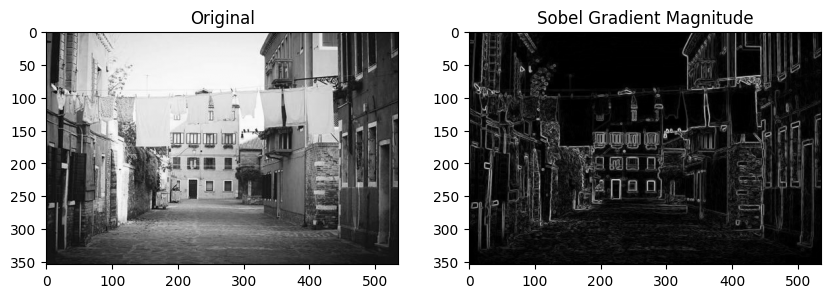

In [354]:
def sobel_filters(image):
    #  Define standard Sobel Kernels
    Gx_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])

    Gy_kernel = np.array([[-1, -2, -1],
                          [ 0,  0,  0],
                          [ 1,  2,  1]])
    gx = convolve(image, Gx_kernel)
    gy = convolve(image, Gy_kernel)

    magnitude = np.sqrt(gx**2 + gy**2)

    magnitude = (magnitude / magnitude.max()) * 255

    direction = np.arctan2(gy, gx) * (180 / np.pi) # Convert to degrees

    return magnitude, direction

mag, theta = sobel_filters(gray)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(gray, cmap='gray'); plt.title("Original")
plt.subplot(1, 2, 2); plt.imshow(mag, cmap='gray'); plt.title("Sobel Gradient Magnitude")
plt.show()

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [355]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.
laplacian_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]], dtype=np.float32)

lap = convolve(gray, laplacian_kernel)
alpha = 1
sharp = gray - alpha * lap
sharp_alpha1=gray-lap
import cv2
lap_cv = cv2.Laplacian(gray.astype(np.float32), cv2.CV_32F)
sharp_cv=gray-lap_cv
print(np.allclose(sharp_alpha1, sharp_cv))


False


In [356]:
blur = convolve(gray, gaussian_kernel(5, 1))
mask = gray - blur
# Sharpen (positive alpha)
alpha = 0.7
unsharp = gray + alpha * mask

# Negative alpha gives more blur
alpha_neg = -0.7
extra_blur = gray + alpha_neg * mask


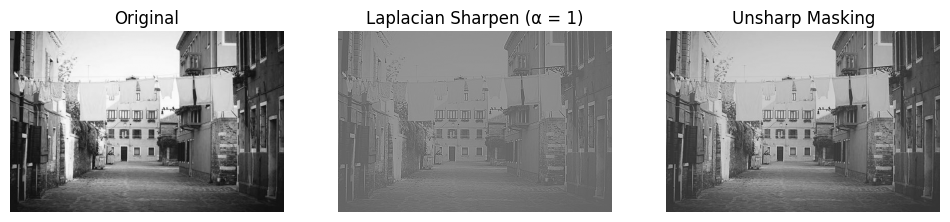

In [357]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(gray, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(sharp_alpha1, cmap="gray")
plt.title("Laplacian Sharpen (α = 1)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(unsharp, cmap="gray")
plt.title("Unsharp Masking")
plt.axis("off")

plt.show()

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

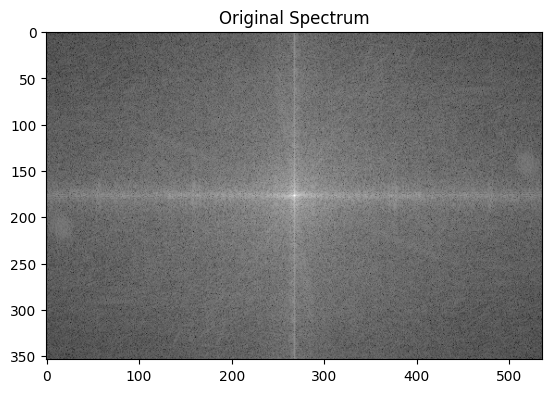

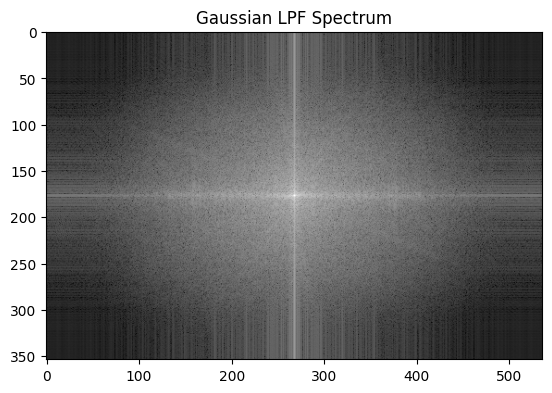

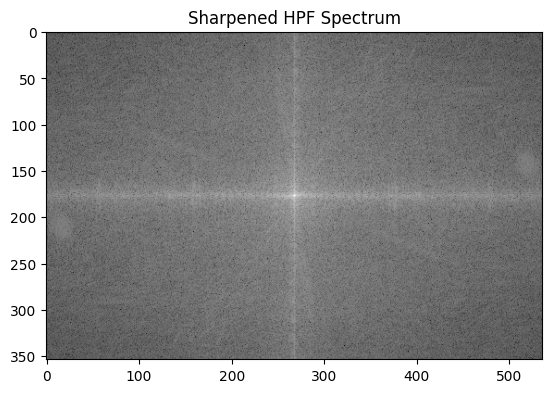

In [358]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.
def magnitude_spectrum(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return np.log(1 + np.abs(fshift))

plt.imshow(magnitude_spectrum(gray), cmap='gray')
plt.title("Original Spectrum")
plt.show()

plt.imshow(magnitude_spectrum(blur), cmap='gray')
plt.title("Gaussian LPF Spectrum")
plt.show()

plt.imshow(magnitude_spectrum(sharp_unsharp), cmap='gray')
plt.title("Sharpened HPF Spectrum")
plt.show()




### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

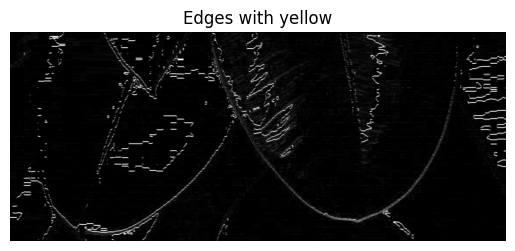

In [359]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.
R, G, B = img_part5[:,:,0], img_part5[:,:,1], img_part5[:,:,2]
Y = (R + G) - 2 * B

edge_kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]], dtype=np.float32)

yellow_edges = convolve(Y, edge_kernel)
yellow_edges = np.abs(yellow_edges)
yellow_edges = (yellow_edges / yellow_edges.max()) * 255
yellow_edges = yellow_edges.astype(np.uint8)


plt.imshow(yellow_edges, cmap="gray")
plt.title("Edges with yellow")
plt.axis("off")
plt.show()



### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
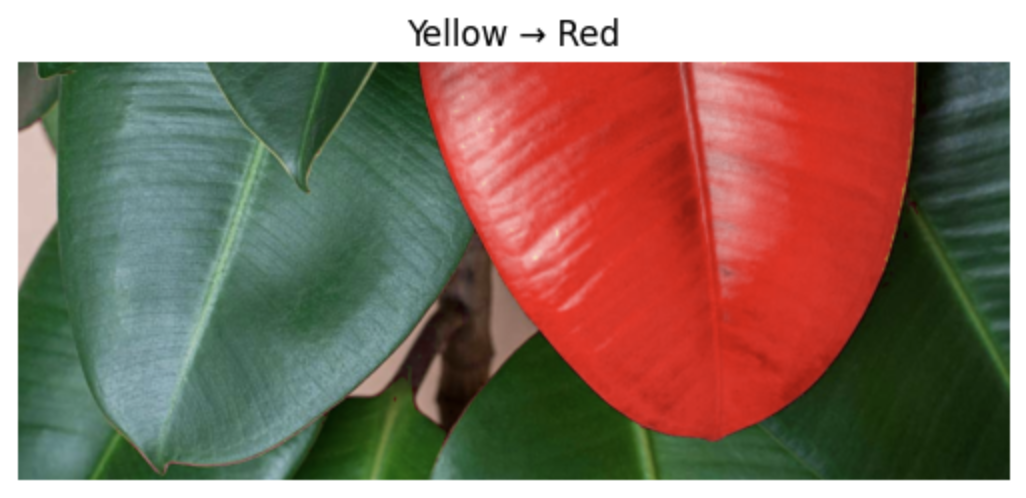

Also, we can change to a less brighter colour
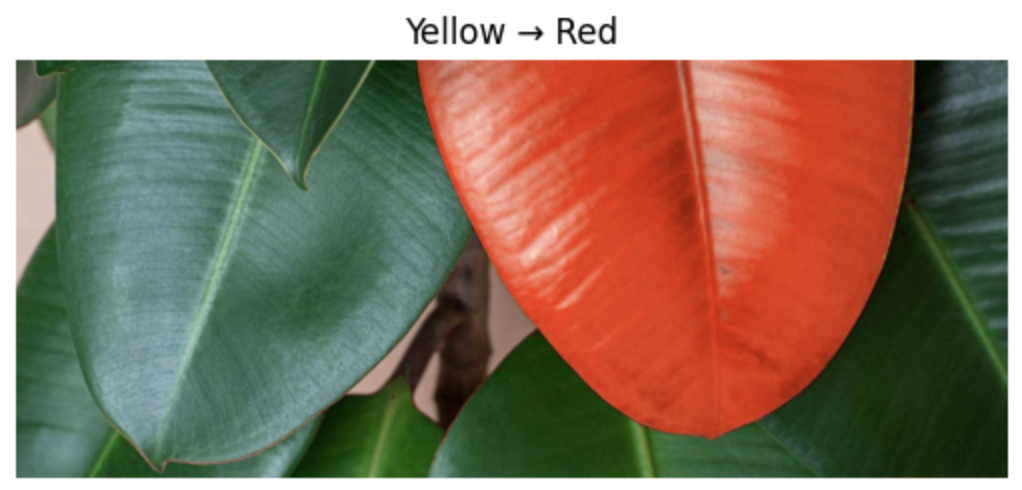

In [360]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.
